# Étapes d’EDA pour le projet Radar
-------------------------------------------------------------------------------------------------------

In [1]:
# Données utilisées depuis le Bucket S3:
# df_competence_rome_eda.csv

In [2]:
# Install specific libraries for Amazon S3 connection:
%pip install boto3
%pip install python-dotenv
%pip install plotly.express
%pip install ipython
%pip install nbformat

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import io
import os
from dotenv import load_dotenv
import boto3
import networkx as nx
import plotly.express as px

In [4]:
# Modification des paramèters d'affichage de Pandas:
pd.set_option('display.max_row', 111)
pd.set_option('display.max_column', 111)
pd.set_option("display.max_colwidth", None)

In [5]:
# Load environment variables with specific location depend on EDI (PyCharm/VSCode)
if not load_dotenv('../settings/.env'):
    print("Load env from alternative from path")
    load_dotenv('script/settings/.env')

# Check settings (for debug session only)
if __debug__:
    print('Debug ON')
    print("Environment data:", 
        "\nS3_ENDPOINT_URL:", os.getenv("S3_ENDPOINT_URL"),
        "\nS3_ACCESS_KEY_ID (len):", len(os.getenv("S3_ACCESS_KEY_ID")), "bytes",
        "\nS3_SECRET_ACCESS_KEY (len):", len(os.getenv("S3_SECRET_ACCESS_KEY")), "bytes",
        "\nS3_REGION:", os.getenv("S3_REGION")
        )

Debug ON
Environment data: 
S3_ENDPOINT_URL: https://bhckzdwrhhfaxbidmwpm.supabase.co/storage/v1/s3 
S3_ACCESS_KEY_ID (len): 32 bytes 
S3_SECRET_ACCESS_KEY (len): 64 bytes 
S3_REGION: eu-west-3


In [6]:
# Init S3 client 
try:
    s3_client = boto3.client(
        service_name='s3',
        region_name=os.getenv("S3_REGION"),
        endpoint_url=os.getenv("S3_ENDPOINT_URL"),
        aws_access_key_id=os.getenv("S3_ACCESS_KEY_ID"), 
        aws_secret_access_key=os.getenv("S3_SECRET_ACCESS_KEY")
    ) 
except Exception as ex:
    print(ex)

# Define function to read ROME CSV files
def read_ml_from_s3(s3_file_key):
    bucket_name = 'ML'
    s3_ml_path = ''

    try:
        obj = s3_client.get_object(Bucket= bucket_name, Key= s3_ml_path + s3_file_key)
        df = pd.read_csv(io.BytesIO(obj['Body'].read()))
        return df
    except Exception as ex:
        print("Erreur de lecture du fichier depuis le buecket S3:")
        print("->", ex)
    
    return None

# S3 CSV reading test
df = read_ml_from_s3( 'df_competence_rome_eda_v2.csv')
if df is not None:
    print("Lecture du fichier réussi:")
    print(f"-> CSV: Nb de lignes: {df.shape[0]}, Nb de colonnes: {df.shape[1]}")

Lecture du fichier réussi:
-> CSV: Nb de lignes: 38961, Nb de colonnes: 17


In [7]:
# On récupère les données qui nous seront utiles
file_path_name = 'df_competence_rome_eda_v2.csv'

try:
    df = read_ml_from_s3( file_path_name)
    print(f"Arborescence: Nb de lignes: {df.shape[0]}, Nb de colonnes: {df.shape[1]}")
except:
    print('Erreur lors de la lecture du fichier!')

Arborescence: Nb de lignes: 38961, Nb de colonnes: 17


## Analyse de la forme

### 1. Inspection et qualité des données

 - Vérifier les dimensions du dataset (lignes, colonnes).
 - Vérifier les types de variables (catégorielles vs numériques).
 - Rechercher les valeurs manquantes (NaN) et décider : suppression / imputation.
 - Détecter les doublons éventuels (par exemple mêmes couples code_rome–code_ogr_competence).
 - Vérifier la cohérence des clés (chaque code_rome existe bien, chaque code_ogr_competence est relié).

In [8]:
# 1. Inspection et qualité des données
# Vérifier les dimensions du dataset (lignes, colonnes).
print(f"Nombre de lignes: {df.shape[0]}, nb de colonnes: {df.shape[1]}")

Nombre de lignes: 38961, nb de colonnes: 17


In [9]:
# Vérifier les types de variables (catégorielles vs numériques).
df.dtypes

Unnamed: 0                   int64
code_rome                   object
libelle_rome                object
emploi_cadre                object
code_ogr_competence          int64
libelle_competence          object
cat_comp                    object
sous_cat_comp               object
enjeu                       object
objectif                    object
libelle_macro_competence    object
domaine_competence          object
coeur_metier                object
transition_eco_x            object
transition_num_x            object
transition_eco_y            object
transition_num_y            object
dtype: object

In [10]:
# Afficher les première lignes du dataset:
df.head(20)

Unnamed: 0 code_rome  \
0            0     A1101   
1            1     A1101   
2            2     A1101   
3            3     A1101   
4            4     A1101   
5            5     A1101   
6            6     A1101   
7            7     A1101   
8            8     A1101   
9            9     A1101   
10          10     A1101   
11          11     A1101   
12          12     A1101   
13          13     A1101   
14          14     A1101   
15          15     A1101   
16          16     A1101   
17          17     A1101   
18          18     A1101   
19          19     A1102   

                                                   libelle_rome emploi_cadre  \
0                   Conducteur / Conductrice d'engins agricoles          NaN   
1                   Conducteur / Conductrice d'engins agricoles          NaN   
2                   Conducteur / Conductrice d'engins agricoles          NaN   
3                   Conducteur / Conductrice d'engins agricoles          NaN   
4                   Conducteur / Conductrice d'engins agricoles          NaN   
5                   Conducteur / Conductrice d'engins agricoles          NaN   
6                   Conducteur / Conductrice d'engins agricoles          NaN   
7                   Conducteur / Conductrice d'engins agricoles          NaN   
8                   Conducteur / Conductrice d'engins agricoles          NaN   
9                   Conducteur / Conductrice d'engins agricoles          NaN   
10                  Conducteur / Conductrice d'engins agricoles          NaN   
11                  Conducteur / Conductrice d'engins agricoles          NaN   
12                  Conducteur / Conductrice d'engins agricoles          NaN   
13                  Conducteur / Conductrice d'engins agricoles          NaN   
14                  Conducteur / Conductrice d'engins agricoles          NaN   
15                  Conducteur / Conductrice d'engins agricoles          NaN   
16                  Conducteur / Conductrice d'engins agricoles          NaN   
17                  Conducteur / Conductrice d'engins agricoles          NaN   
18                  Conducteur / Conductrice d'engins agricoles          NaN   
19  Conducteur / Conductrice d'engins d'exploitation forestière          NaN   

    code_ogr_competence  \
0                104016   
1                107141   
2                110024   
3                117548   
4                122567   
5                122568   
6                122573   
7                122730   
8                122817   
9                122853   
10               123176   
11               125527   
12               300160   
13               400094   
14               402131   
15               404006   
16               404016   
17               404020   
18               483361   
19               100023   

                                                                          libelle_competence  \
0                                    Contrôler le fonctionnement d'un dispositif de sécurité   
1                                              Entretenir les mécanismes d'un engin motorisé   
2                                                                    Conduire un poids lourd   
3                                                                         Stocker un produit   
4                                       Débroussailler une plantation et ses chemins d'accès   
5                                                          Contrôler l'état d'une plantation   
6   Planifier une opération de semis, de traitement ou de récolte sur un site d'exploitation   
7                                 Préparer les sols, les plantations (épandage, semis, etc.)   
8                                                         Réaliser des travaux d'aménagement   
9                         Récolter un produit à maturité et selon les consignes de calibrage   
10                                         Traiter une information météorologique recueillie   
11            

Unnamed: 0                   0.00
domaine_competence           0.00
libelle_macro_competence     0.00
objectif                     0.00
sous_cat_comp                0.00
cat_comp                     0.00
enjeu                        0.00
code_ogr_competence          0.00
libelle_rome                 0.00
code_rome                    0.00
libelle_competence           0.00
transition_eco_x             0.19
emploi_cadre                 7.86
transition_num_x             9.98
transition_num_y            15.01
transition_eco_y            58.03
coeur_metier                58.83
dtype: float64


<Axes: >

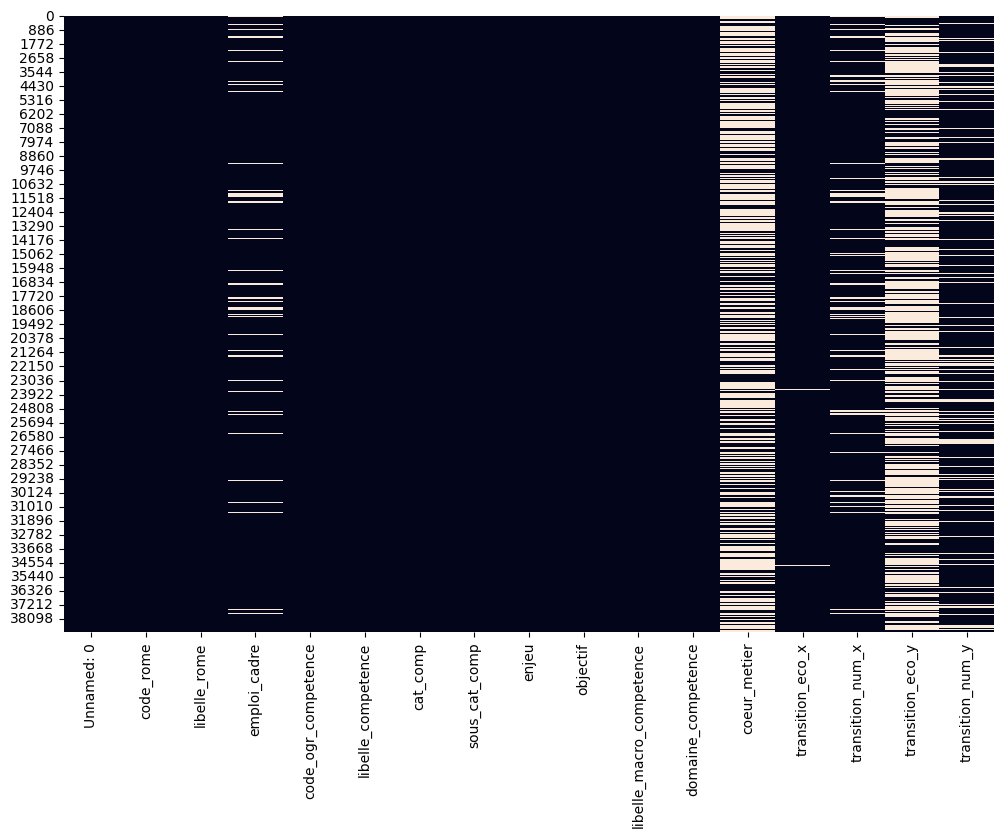

In [11]:
# Rechercher les valeurs manquantes (NaN) et décider : suppression / imputation.

# Taux de valeur nulles (en %):
df_nan = (df.isna().sum()/df.shape[0]).sort_values(ascending= True)
df_nan = df_nan * 100
print(f"{df_nan.round(2)}")

# Heat map
plt.figure(figsize=(12,8))
sns.heatmap(df.isna(), cbar= False)

# Analyse de la colonne 'emploi_cadre'

In [12]:
# Lister les valeurs
print("Nb de valeur:")
print(f"{df['emploi_cadre'].value_counts()}")

print("Nb de valeur nulles:", f"{df['emploi_cadre'].isna().sum()}")

Nb de valeur:
emploi_cadre
N    22053
O    13847
Name: count, dtype: int64
Nb de valeur nulles: 3061


In [13]:
df_code_rome = df.groupby('code_rome').count()
nb_code_rome = df_code_rome.shape[0]
print(f"Nombre de code rome unique: {nb_code_rome}")

Nombre de code rome unique: 1584


In [14]:
# Visualiser les emploi non cadre (N):
df_non_cadre = df.loc[df["emploi_cadre"] == "N", "code_rome"].drop_duplicates()
code_rome_non_cadre = df_non_cadre.count()
print("code_rome non cadre=", code_rome_non_cadre)
df_cadre = df.loc[df["emploi_cadre"] == "O", "code_rome"].drop_duplicates()
code_rome_cadre = df_cadre.count()
print("code_rome cadre=", code_rome_cadre)
df_cadre_nan = df.loc[df["emploi_cadre"].isna(), "code_rome"].drop_duplicates()
code_rome_cadre_nan = df_cadre_nan.count()
print("code_rome NaN=", code_rome_cadre_nan)

print(f"Différence: {code_rome_cadre_nan + code_rome_non_cadre + code_rome_cadre} sur {nb_code_rome} code_rome au total")

# -> Tous les code_rome sont soit 'cadre', soit 'non cadre', soit 'NaN'. Il n'y a pas de code_rome avec des emploi_cadre mixte.

code_rome non cadre= 861
code_rome cadre= 549
code_rome NaN= 174
Différence: 1584 sur 1584 code_rome au total


In [15]:
df_non_cadre = df.loc[df["emploi_cadre"] == "N", "libelle_competence"]
print(df_non_cadre)

# -> Les "emploi_cadre" à 'N' sont attribués aux compétences et non pas au code_rome

37                                                           Abattre un arbre
38                                                         Tailler les arbres
39                    Contrôler le fonctionnement d'un dispositif de sécurité
40                                                         Débarder une grume
41                                                         Empiler des grumes
                                         ...                                 
38956       Evaluer les risques liés aux différentes opérations sur le réseau
38957                       Appliquer les protocoles de sécurité ferroviaires
38958                                   Atteler/dételer les wagons d'un train
38959    Identifier des dangers, problèmes ou besoins matériels et techniques
38960          Respecter les procédures et les règles de sécurité ferroviaire
Name: libelle_competence, Length: 22053, dtype: object


# Analyse de la colonne 'coeur_metier'

In [16]:
# Lister les valeurs
print("Nb de valeur:")
print(f"{df['coeur_metier'].value_counts()}")
print("Nb de valeur nulles:")
print(f"{df['coeur_metier'].isna().sum()}")

Nb de valeur:
coeur_metier
Principale    14768
Émergente      1271
Name: count, dtype: int64
Nb de valeur nulles:
22922


In [17]:
# Visualiser les compétences émergentes:
df_emergente = df[df['coeur_metier'] == "Émergente"].groupby('libelle_competence')[['libelle_competence', 'coeur_metier']]
df_emergente.head(30)

libelle_competence  \
55     Identifier les opérations à réaliser à partir des diagnostics et des données fournies par un drone   
59                                                     Gérer les déchets forestiers de manière écologique   
61                        Promouvoir les pratiques de gestion durable auprès des propriétaires forestiers   
80                                                     Gérer les ressources naturelles de manière durable   
110                                                      Gérer les déchets végétaux de manière écologique   
...                                                                                                   ...   
38430                                                                    Sensibiliser au bien-être animal   
38520                                                               Appliquer les principes d'écoconduite   
38710                             Utiliser des systèmes de navigation avancés pour optimiser les parcours   
38779                                                       Mettre en place une politique éco-responsable   
38930                                                               Appliquer les principes d'écoconduite   

      coeur_metier  
55       Émergente  
59       Émergente  
61       Émergente  
80       Émergente  
110      Émergente  
...            ...  
38430    Émergente  
38520    Émergente  
38710    Émergente  
38779    Émergente  
38930    Émergente  

[1266 rows x 2 columns]

In [18]:
# Visualiser les compétences principale:
df_principale = df[df['coeur_metier'] == "Principale"].groupby('libelle_competence')[['libelle_competence', 'coeur_metier']]
df_principale.head(30)

libelle_competence  \
6      Planifier une opération de semis, de traitement ou de récolte sur un site d'exploitation   
7                                    Préparer les sols, les plantations (épandage, semis, etc.)   
9                            Récolter un produit à maturité et selon les consignes de calibrage   
11                                         Effectuer des opérations agricoles (semis, récoltes)   
12                                      Régler les systèmes hydrauliques des machines agricoles   
...                                                                                         ...   
38955                        Coordonner les opérations de manœuvre pour l'assemblage des trains   
38956                         Evaluer les risques liés aux différentes opérations sur le réseau   
38957                                         Appliquer les protocoles de sécurité ferroviaires   
38958                                                     Atteler/dételer les wagons d'un train   
38960                            Respecter les procédures et les règles de sécurité ferroviaire   

      coeur_metier  
6       Principale  
7       Principale  
9       Principale  
11      Principale  
12      Principale  
...            ...  
38955   Principale  
38956   Principale  
38957   Principale  
38958   Principale  
38960   Principale  

[14702 rows x 2 columns]

In [19]:
# Visualiser les compétences NaN:
df_principale = df[df['coeur_metier'].isna()].groupby('libelle_competence')[['libelle_competence', 'coeur_metier']]
df_principale.head(30)

libelle_competence  \
0                          Contrôler le fonctionnement d'un dispositif de sécurité   
1                                    Entretenir les mécanismes d'un engin motorisé   
2                                                          Conduire un poids lourd   
3                                                               Stocker un produit   
4                             Débroussailler une plantation et ses chemins d'accès   
...                                                                            ...   
38948               Communiquer efficacement avec les passagers et la gare opposée   
38951                   Coordonner les opérations de chargement et de déchargement   
38953             Assurer la sécurité des opérations de chargement et déchargement   
38954  Superviser les opérations de chargement et de déchargement des marchandises   
38959         Identifier des dangers, problèmes ou besoins matériels et techniques   

      coeur_metier  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  
...            ...  
38948          NaN  
38951          NaN  
38953          NaN  
38954          NaN  
38959          NaN  

[22599 rows x 2 columns]

In [20]:
# Visualiser les nombres de valeurs non nulles de chaque colonne par code_rome:
df.groupby('code_rome').count()

Unnamed: 0  libelle_rome  emploi_cadre  code_ogr_competence  \
code_rome                                                                
A1101              19            19             0                   19   
A1102              18            18             0                   18   
A1201              26            26            26                   26   
A1202              24            24            24                   24   
A1203              29            29            29                   29   
...               ...           ...           ...                  ...   
N4304              15            15            15                   15   
N4305               7             7             0                    7   
N4401               6             6             0                    6   
N4402              23            23            23                   23   
N4403              12            12            12                   12   

           libelle_competence  cat_comp  sous_cat_comp  enjeu  objectif  \
code_rome                                                                 
A1101                      19        19             19     19        19   
A1102                      18        18             18     18        18   
A1201                      26        26             26     26        26   
A1202                      24        24             24     24        24   
A1203                      29        29             29     29        29   
...                       ...       ...            ...    ...       ...   
N4304                      15        15             15     15        15   
N4305                       7         7              7      7         7   
N4401                       6         6              6      6         6   
N4402                      23        23             23     23        23   
N4403                      12        12             12     12        12   

           libelle_macro_competence  domaine_competence  coeur_metier  \
code_rome                                                               
A1101                            19                  19             7   
A1102                            18                  18             5   
A1201                            26                  26            10   
A1202                            24                  24             7   
A1203                            29                  29            10   
...                             ...                 ...           ...   
N4304                            15                  15             9   
N4305                             7                   7             5   
N4401                             6                   6             4   
N4402                            23                  23             7   
N4403                            12                  12             8   

           transition_eco_x  transition_num_x  transition_eco_y  \
code_rome                                                         
A1101                    19                 0                 3   
A1102                    18                 0                 5   
A1201                    26                26                10   
A1202                    24                24                11   
A1203                    29                29                13   
...                     ...               ...               ...   
N4304                    15                15                12   
N4305                     7                 0                 2   
N4401                     6                 0                 0   
N4402                    23                23                14   
N4403                    12                12                 4   

           transition_num_y  
code_rome                    
A1101                    16  
A1102                    17  
A1201                    26  
A1202                    21  
A1203                    26  
...                     ...  
N4304     

In [21]:
# Nombre de code_rome sans coeur_metier de type 'Principale':
df_principale = df.groupby("libelle_rome")["coeur_metier"].apply(lambda x: (x == "Principale").sum()).reset_index()
df_principale[df_principale['coeur_metier'] == 0]

libelle_rome  coeur_metier
316                                       Chef / Cheffe d'escale             0
430                                            Concierge d'hôtel             0
431           Conducteur / Conductrice Véhicule Léger de l'armée             0
463  Conducteur / Conductrice de navette de moins de 9 personnes             0
728                   Electricien / Electricienne de maintenance             0

In [22]:
# -> Il n'y a que 5 métiers (sur 1584) qui n'ont pas de compétence 'Principale'
# -> Remplacer les valeurs NaN par une valeur (ex: 'Secondaire').

### Analyse de la colonne 'transition_eco'

In [23]:
# Lister les valeurs
print("Nb de valeur transition_eco_x:")
print(f"{df['transition_eco_x'].value_counts()}")
print("Nb de valeur nulles transition_eco_x:", f"{df['transition_eco_x'].isna().sum()}")

print("\nNb de valeur transition_eco_y:")
print(f"{df['transition_eco_y'].value_counts()}")
print("Nb de valeur nulles transition_eco_y:", f"{df['transition_eco_y'].isna().sum()}")

Nb de valeur transition_eco_x:
transition_eco_x
Emploi Blanc                                        28941
Emploi stratégique pour la Transition écologique     6610
Emploi Vert                                          2538
Emploi Brun                                           797
Name: count, dtype: int64
Nb de valeur nulles transition_eco_x: 75

Nb de valeur transition_eco_y:
transition_eco_y
N    13958
O     2393
Name: count, dtype: int64
Nb de valeur nulles transition_eco_y: 22610


 Définitions:
 - `Emplois verts` → métiers directement liés à la protection de l’environnement ou à la gestion des ressources naturelles (ex. technicien en traitement des déchets, chargé d’études environnement, énergies renouvelables).
 - `Emplois verdissants / stratégiques pour la transition écologique` → métiers “classiques” qui doivent évoluer fortement pour intégrer des compétences environnementales (ex. bâtiment, transports, agriculture).
 - `Emplois bruns` → métiers qui ont un impact environnemental négatif marqué, souvent associés à des secteurs très émetteurs (raffinage, extraction fossile, certaines industries lourdes).
 - `Emplois blancs` → tous les autres métiers, sans lien direct avec l’écologie, ni dans le positif, ni dans le négatif (ex. coiffeur, comptable, professeur).

In [24]:
# Nombre de code_rome sans valeur de transition ecologique ('transition_eco_x' is NaN pour toutes les compétences du code_rome):
df_principale = df.groupby("libelle_rome")["transition_eco_x"].apply(lambda x: (x.isna() == False).sum()).reset_index()
df_principale[df_principale['transition_eco_x'] == 0]

# -> 3 code_rome sans valeur de transition_ecologique_x: c'est négligeable, on les considérera comme 'Emploi Blanc', sans impact direct sur l'écologie.

libelle_rome  \
293          Chargé / Chargée des relations avec les influenceurs   
562     Coordinateur / Coordinatrice en activité physique adaptée   
754  Enseignant / Enseignante en activité physique adaptée (EAPA)   

     transition_eco_x  
293                 0  
562                 0  
754                 0

In [25]:
# Nombre de code_rome sans valeur de transition ecologique ('transition_eco_y' is NaN pour toutes les compétences du code_rome):
df_principale = df.groupby("libelle_rome")["transition_eco_y"].apply(lambda x: (x.isna() == False).sum()).reset_index()
df_principale[df_principale['transition_eco_y'] == 0]

# -> 169 code_rome sans valeur de transition-ecologique_y

libelle_rome  \
1     Accompagnant / Accompagnante des élèves en situation de handicap (AESH)   
10                                                                   Actuaire   
45                                     Agent / Agente de fabrication du verre   
46                                     Agent / Agente de façonnage et routage   
48                                        Agent / Agente de la force publique   
...                                                                       ...   
1565                        Vendeur / Vendeuse d'articles de sport et loisirs   
1568                                      Vendeur / Vendeuse en prêt-à-porter   
1570                                           Vendeur / Vendeuse en épicerie   
1571                            Vendeur / Vendeuse en équipement de la maison   
1582                                                            Yield manager   

      transition_eco_y  
1                    0  
10                   0  
45                   0  
46                   0  
48                   0  
...                ...  
1565                 0  
1568                 0  
1570                 0  
1571                 0  
1582                 0  

[169 rows x 2 columns]

In [26]:
# 
tableau = pd.crosstab(
    df["transition_eco_x"], # referentiel_code_rome
    df["transition_eco_y"], # referentiel_competence
    dropna=False
)
 
display(tableau)

transition_eco_y                                      N    O    NaN
transition_eco_x                                                   
Emploi Blanc                                      11153  979  16809
Emploi Brun                                         194   41    562
Emploi Vert                                         585  733   1220
Emploi stratégique pour la Transition écologique   2001  639   3970
NaN                                                  25    1     49

### Résultat de la lecture:
Lors de l’analyse des variables liées à la transition écologique, nous avons comparé deux colonnes issues de sources différentes :

transition_eco_x (au niveau des métiers – code ROME)

transition_eco_y (au niveau des compétences – référentiel compétence)

L’analyse croisée met en évidence que :

La colonne transition_eco_y contient une très forte proportion de valeurs manquantes (NaN).
Cela limite fortement son exploitation directe, car la majorité des compétences n’ont pas d’indication explicite de transition écologique.

La colonne transition_eco_x est beaucoup plus robuste.
Elle catégorise chaque métier en Emploi Blanc, Emploi Brun, Emploi Vert ou Emploi stratégique pour la Transition écologique.
Cette classification couvre bien l’ensemble des métiers et ne présente que très peu de valeurs manquantes.

Pour les analyses et la modélisation, il est donc plus pertinent d’utiliser transition_eco_x comme variable principale pour identifier les métiers en lien avec la transition écologique.
La colonne transition_eco_y pourra éventuellement être exploitée en complément, mais uniquement à titre exploratoire, compte tenu de son caractère lacunaire.

`-> Il faudra supprimer la colonne transition_eco_y`

In [27]:
# -> La colonnes transition_eco_y, provenant de referentiel_competence, n'est pas utilisable car elle contient trop de valeur non définies (+ de 58%).
# -> Il faudra utiliser la colonne transition_eco_x qui est liée au code_rome et ne contient que 3 code_rome sans transition éco. de définie (- de 0.2%).

### Analyse des colonnes 'transition_num'

In [28]:
# Lister les valeurs
print("Nb de valeur transition_num_x (referentiel_code_rome):")
print(f"{df['transition_num_x'].value_counts()}")
print("Nb de valeur nulles transition_num_x:", f"{df['transition_num_x'].isna().sum()}")

print("\nNb de valeur transition_num_y (referentiel_competence):")
print(f"{df['transition_num_y'].value_counts()}")
print("Nb de valeur nulles transition_num_y:", f"{df['transition_num_y'].isna().sum()}")

Nb de valeur transition_num_x (referentiel_code_rome):
transition_num_x
N    30341
O     4730
Name: count, dtype: int64
Nb de valeur nulles transition_num_x: 3890

Nb de valeur transition_num_y (referentiel_competence):
transition_num_y
N    29535
O     3579
Name: count, dtype: int64
Nb de valeur nulles transition_num_y: 5847


In [29]:
# 
tableau = pd.crosstab(
    df["transition_num_x"], # referentiel_code_rome
    df["transition_num_y"], # referentiel_competence
    dropna=False
)
 
display(tableau)

transition_num_y      N     O   NaN
transition_num_x                   
N                 23825  1544  4972
O                  2282  1908   540
NaN                3428   127   335

In [30]:
# -> Il faudra faire un choix car il y 15% de valeur NaN pour la colonne transition_num_y.

In [31]:
# Nombre de code_rome sans valeur de transition numérique ('transition_num_x' is NaN pour ces code_rome):
df_numerique = df.groupby("libelle_rome")["transition_num_x"].apply(lambda x: (x.isna() == False).sum()).reset_index()
df_numerique_na = df_numerique[df_numerique['transition_num_x'] == 0]
df_numerique_na

libelle_rome  \
1     Accompagnant / Accompagnante des élèves en situation de handicap (AESH)   
10                                                                   Actuaire   
38               Agent / Agente d'exploitation transport routier de personnes   
39                                          Agent / Agente de conditionnement   
45                                     Agent / Agente de fabrication du verre   
...                                                                       ...   
1568                                      Vendeur / Vendeuse en prêt-à-porter   
1570                                           Vendeur / Vendeuse en épicerie   
1571                            Vendeur / Vendeuse en équipement de la maison   
1575                                               Viticulteur / Viticultrice   
1582                                                            Yield manager   

      transition_num_x  
1                    0  
10                   0  
38                   0  
39                   0  
45                   0  
...                ...  
1568                 0  
1570                 0  
1571                 0  
1575                 0  
1582                 0  

[222 rows x 2 columns]

In [32]:
print(f"Pourcentage de valeur manquante: {df_numerique_na.shape[0]/df_numerique.shape[0]*100:.2f}%")

Pourcentage de valeur manquante: 14.02%


In [33]:
# -> 222 métiers n'ont pas de transition numérique (NaN) sur 1584, soit 14%.

In [34]:
# Nombre de code_rome sans valeur de transition numérique ('transition_num_y' is NaN pour toutes les compétences du code_rome):
df_principale = df.groupby("libelle_rome")["transition_num_y"].apply(lambda x: (x.isna() == False).sum()).reset_index()
df_principale[df_principale['transition_num_y'] == 0]

libelle_rome  \
516                   Conseiller / Conseillère produits en véhicules   
1427    Spécialiste de l’aide au déploiement des forces combattantes   
1428         Spécialiste des systèmes de communication opérationnels   
1430  Spécialiste du soutien ou de la formation propulsion nucléaire   

      transition_num_y  
516                  0  
1427                 0  
1428                 0  
1430                 0

In [35]:
# Ces métiers devraient avoir des compétences identifiées en 'transition numérique'.
# -> Les données ne semblent pas complètes, difficiles à utiliser en l'état.

### Résultat de la lecture:
Lors de l’analyse des variables liées à la transition numérique, nous avons comparé deux colonnes issues de sources différentes :

transition_num_x (au niveau des métiers – code ROME)

transition_num_y (au niveau des compétences – référentiel compétence)

L’analyse croisée met en évidence que :

Comme pour la transition écologique, transition_num_x (au niveau métier) est l’indicateur le plus robuste, tandis que transition_num_y (au niveau compétence) présente trop de valeurs manquantes (=15 %) pour être utilisée comme variable principale.

Cependant, la colonne transition_num_x semble incomplète car nous avons identifié des métiers qui devraient avoir au moins une compétence en 'transition numérique'.
Nous considérons cette colonne non utilisable.

In [36]:
# Détecter les doublons éventuels (par exemple mêmes couples et code_rome code_ogr_competence).
# Doublons sur code_rome + code_ogr_competence
doublons_cles = df.duplicated(subset=['code_rome', 'code_ogr_competence']).sum()
print("Nombre de doublons sur (code_rome, code_ogr_competence) :", doublons_cles)

Nombre de doublons sur (code_rome, code_ogr_competence) : 0


In [37]:
# -> Pour un même code_rome, il n'y a pas plusieurs fois la même compétence

In [38]:
# Vérifier la cohérence des clés (chaque code_rome existe bien, chaque code_ogr_competence est relié).

# 5. Cohérence des clés
print("\nNombre de métiers uniques (code_rome) :", df['code_rome'].nunique())
print("Nombre de compétences uniques (code_ogr_competence) :", df['code_ogr_competence'].nunique())
 
# Vérification des clés manquantes
if df['code_rome'].isna().any() or df['code_ogr_competence'].isna().any():
    print("Attention : Codes manquants dans code_rome ou code_ogr_competence !")
else:
    print("Tous les codes_rome et code_ogr_competence sont présents.")
    


Nombre de métiers uniques (code_rome) : 1584
Nombre de compétences uniques (code_ogr_competence) : 16583
Tous les codes_rome et code_ogr_competence sont présents.


In [39]:
# -> Le dataframe ne contient pas de code_rome à NaN ce qui est normal car nous l'avons créé avec une jointure interne.
# -> Idem pour les code_ogr_competence.

### 2. Analyse descriptive générale

 - Nombre total de métiers (code_rome distincts).
 - Nombre total de compétences (code_ogr_competence distincts).
 - Nombre moyen de compétences par métier.
 - Nombre de domaines (domaine_competence).
 - Répartition compétences coeur vs secondaires (coeur_metier).
 - Nombre d'enjeu
 - Nombre d'objectif
 - Nombre de macro-compétence

In [40]:
# Nombre total de métiers (code_rome distincts).
nb_code_rome = df['code_rome'].nunique()
print("\nNombre de code_rome uniques :", nb_code_rome)


Nombre de code_rome uniques : 1584


In [41]:
# Nombre total de compétences (code_ogr_competence distincts).
nb_competence = df['code_ogr_competence'].nunique()
print("Nombre de compétences uniques (code_ogr_competence) :", nb_competence)

Nombre de compétences uniques (code_ogr_competence) : 16583


In [42]:
# Nombre moyen de compétences par métier.
competences_par_metier = df.groupby('code_rome').size()
moyenne_competences = competences_par_metier.mean()
print(f"Nombre de compétence moyen par métier : {moyenne_competences:.1f}")

Nombre de compétence moyen par métier : 24.6


In [43]:
# Statistiques supplémentaires sur les compétences par métier
print("\nStatistiques sur le nombre de compétences par métier :")
display(competences_par_metier.describe())


Statistiques sur le nombre de compétences par métier :


count    1584.000000
mean       24.596591
std         9.758396
min         5.000000
25%        18.000000
50%        23.000000
75%        30.000000
max        82.000000
dtype: float64

In [44]:
# Nombre de domaines (domaine_competence).
nb_domaine_competence = df['domaine_competence'].nunique()
print("Nombre de domaine de compétences uniques (domaine_competence) :", nb_domaine_competence)

Nombre de domaine de compétences uniques (domaine_competence) : 6


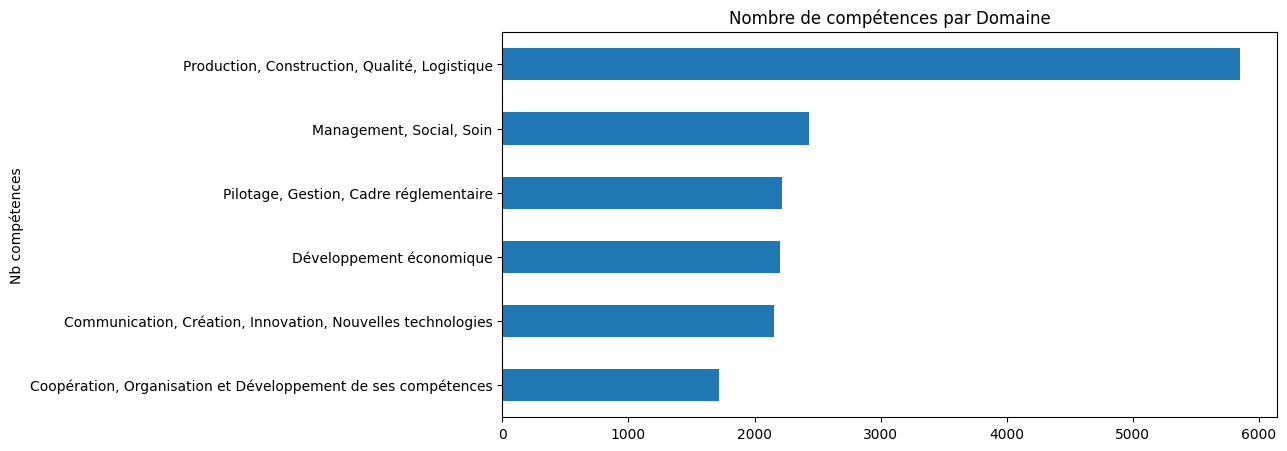

In [45]:
# Compter le nombre de compétences par domaine
comp_par_domaine = (
    df.groupby(["domaine_competence"])["code_ogr_competence"]
    .nunique()
    .sort_values(ascending= True)
)
# Graphique par domaine
comp_par_domaine.plot(
    kind="barh", figsize=(10,5), title="Nombre de compétences par Domaine", 
)
plt.ylabel("Nb compétences")
plt.show()

### Lecture du résultat:
 - Il y a 6 domaines de compétences différents.
 - 'Production, Construction, Qualité, Logistique' est le domaine de compétence qui contient le plus de compétences différentes (presque 6000), et qui a la plus grande variété de compétences.
 - 'Coopération, Organisation et Développement de ses compétences' est celui qui en compte le moins (~1800)

In [46]:
# Répartition compétences coeur vs secondaires (coeur_metier).
# Comptage des valeurs dans la colonne coeur_metier
repartition_coeur = df['coeur_metier'].value_counts(dropna=False)
print("\nRépartition des compétences (coeur_metier) :")
print(repartition_coeur)


Répartition des compétences (coeur_metier) :
coeur_metier
NaN           22922
Principale    14768
Émergente      1271
Name: count, dtype: int64


-> Les valeurs NaN ne traduisent pas une donnée manquante mais correspondent à une catégorie spécifique que nous considérons comme secondaires.

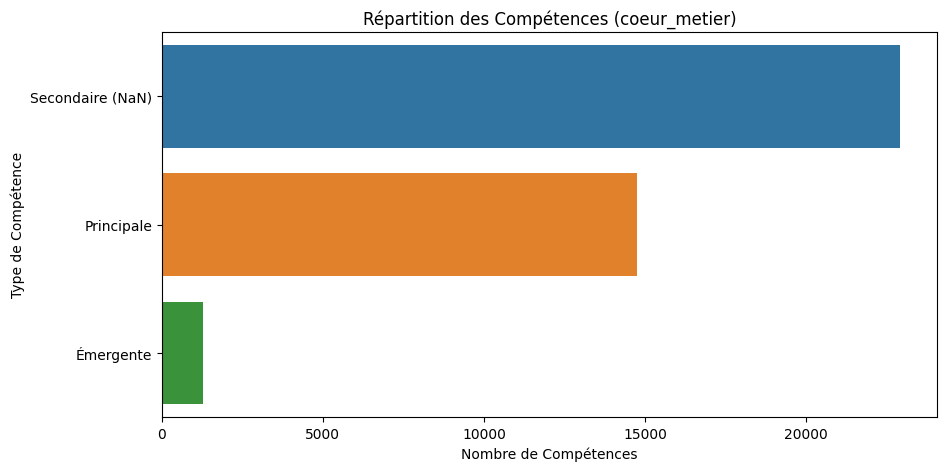

In [47]:
# Visualisation de la répartition des compétences cœur vs secondaires
plt.figure(figsize=(10, 5))
df_tmp = df.copy()
df_tmp['coeur_metier'] = df['coeur_metier'].fillna('Secondaire (NaN)')

sns.countplot(
    data=df_tmp,
    y='coeur_metier',  # <- on passe de x à y
    order=df_tmp['coeur_metier'].value_counts().index,
    hue='coeur_metier'
)

plt.title('Répartition des Compétences (coeur_metier)')
plt.ylabel('Type de Compétence')
plt.xlabel('Nombre de Compétences')
plt.show()

### Lecture du résultat:
La répartition nous indique que la compétence secondaire est la plus répandue. Elle permet de créer une classification des compétences en complément de principale et émergente, tout en ayant un impact moins important.

In [48]:

# Possible de vérifier si le coeur de métier peut être différent en fonction du code_rome

In [ ]:
# Nombre total d'enjeu' (enjeu).
nb_enjeu = df['enjeu'].nunique()
print("Nombre d'enjeux uniques :", nb_enjeu)

print("\nNombre de compétences par enjeu :")
df_enjeu = df.groupby('enjeu').size()
display(df_enjeu.describe())

Nombre d'enjeux uniques : 31

Nombre de compétences par enjeux :


count      31.000000
mean     1256.806452
std       774.589630
min       201.000000
25%       504.000000
50%      1149.000000
75%      1810.000000
max      2838.000000
dtype: float64

-> Il y a entre 201 et 2838 compétences par enjeu (soit en moyenne 1256.8 compétences par enjeu).

In [115]:
# Nombre total d'objectif' (objectif).
nb_objectif = df['objectif'].nunique()
print("\nNombre d'objectifs uniques :", nb_objectif)

print("\nNombre de compétences par objectif :")
df_objectif = df.groupby('objectif').size()
display(df_objectif.describe())



Nombre d'objectifs uniques : 83

Nombre de compétences par objectif :


count      83.000000
mean      469.409639
std       346.907348
min         1.000000
25%       210.000000
50%       398.000000
75%       692.000000
max      1677.000000
dtype: float64

-> Il y a entre 1 et 1677 compétences par objectif (soit en moyenne 469.4).

In [118]:
# Nombre total de macro-compétence' (libelle_macro_competence).
nb_macro_competence = df['libelle_macro_competence'].nunique()
print("Nombre de macro-competences uniques :", nb_macro_competence)

print("\nNombre de compétences par macro-compétences :")
df_macro_comp = df.groupby('libelle_macro_competence').size()
display(df_macro_comp.describe())

Nombre de macro-competences uniques : 487

Nombre de compétences par macro-compétences :


count    487.000000
mean      80.002053
std       88.647717
min        1.000000
25%       21.500000
50%       53.000000
75%      100.000000
max      732.000000
dtype: float64

-> Il y a entre 1 et 732 compétences par macro-compétence (soit en moyenne 80).

### 3. Analyse des métiers
 - Top 10 métiers ayant le plus de compétences.
 - Top 10 métiers avec le plus de compétences coeur de métier.
 - Répartition des métiers par emploi_cadre vs non-cadre.
 - Répartition des métiers par impact transition (transition_num_y, transition_eco_y).

       nombre_competences
count         1584.000000
mean            24.596591
std              9.758396
min              5.000000
25%             18.000000
50%             23.000000
75%             30.000000
max             82.000000


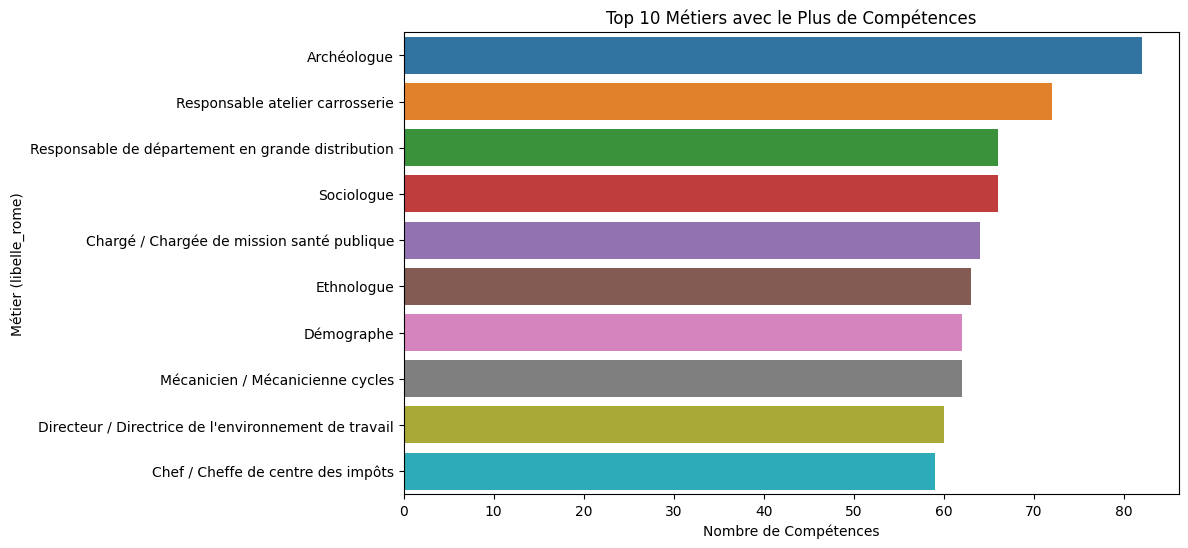

In [52]:
# 3.1. Top 10 métiers ayant le plus de compétences
# Grouper par code_rome et compter les compétences
competences_par_metier = df.groupby(['code_rome', 'libelle_rome']).size().reset_index(name='nombre_competences')

# Trier par nombre de compétences (décroissant) et prendre les 10 premiers
top_10_metiers_competences = competences_par_metier.sort_values(by='nombre_competences', ascending=False).head(10)
#print("Top 10 métiers avec le plus de compétences :")
#print(top_10_metiers_competences[['code_rome', 'libelle_rome', 'nombre_competences']])
print(competences_par_metier.describe())
 
# Visualisation
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_metiers_competences, x='nombre_competences', y='libelle_rome', hue='libelle_rome')
plt.title('Top 10 Métiers avec le Plus de Compétences')
plt.xlabel('Nombre de Compétences')
plt.ylabel('Métier (libelle_rome)')
plt.show()
 

Nombre de compétences 'Principale' :
       nombre_competences_principale
count                    1579.000000
mean                        9.352755
std                         4.793751
min                         1.000000
25%                         6.000000
50%                         8.000000
75%                        12.000000
max                        40.000000


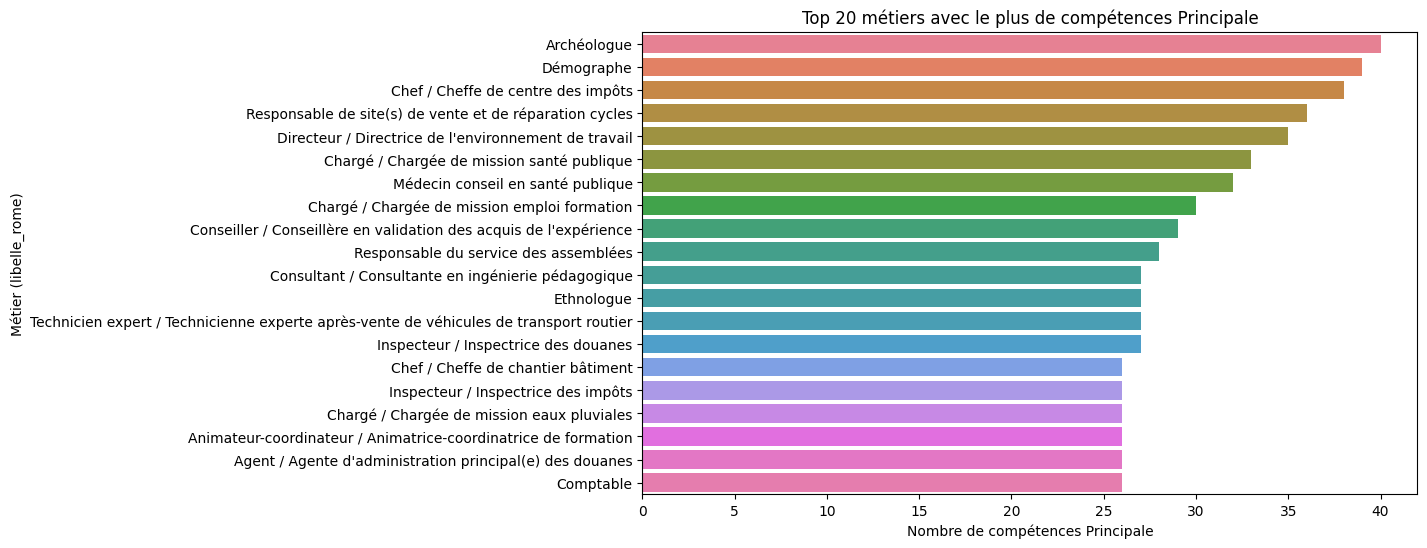

In [53]:
# 3.2. Top 10 métiers avec le plus de compétences coeur de métier 'Principale'
n_top = 20

#========================== Principale ===========================
# Filtrer les compétences où coeur_metier == 'Principale'
competences_principale = df[df['coeur_metier'] == 'Principale']
# Grouper par code_rome et compter
competences_principale_par_metier = competences_principale.groupby(['code_rome', 'libelle_rome']).size().reset_index(name='nombre_competences_principale')
# Trier et prendre les 10 premiers
top_competence_principale = competences_principale_par_metier.sort_values(by='nombre_competences_principale', ascending=False).head(n_top)
print("Nombre de compétences 'Principale' :")
print(competences_principale_par_metier[['code_rome', 'libelle_rome', 'nombre_competences_principale']].describe())

# Visualisation
plt.figure(figsize=(10, 6))
sns.barplot(data=top_competence_principale, x='nombre_competences_principale', y='libelle_rome', hue='libelle_rome')
plt.title(f"Top {top_competence_principale.shape[0]} métiers avec le plus de compétences Principale")
plt.xlabel('Nombre de compétences Principale')
plt.ylabel('Métier (libelle_rome)')
plt.show()

Nombre de compétences 'Émergente' :
       nombre_competences_emergente
count                    727.000000
mean                       1.748281
std                        1.136021
min                        1.000000
25%                        1.000000
50%                        1.000000
75%                        2.000000
max                        8.000000


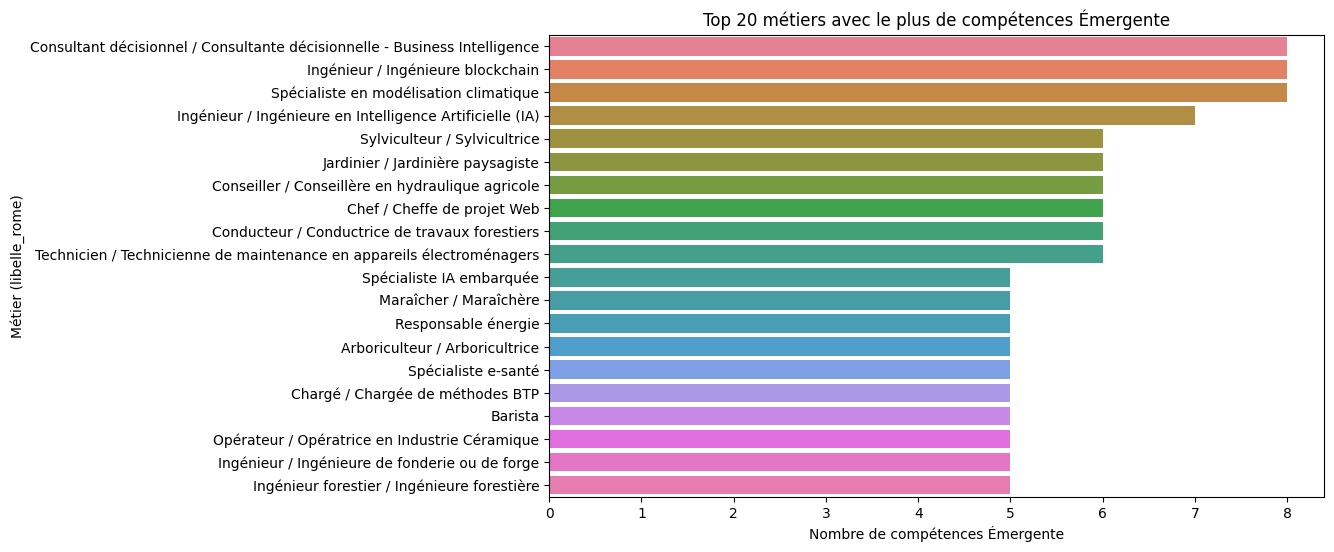

In [54]:
#========================== Émergente ===========================
# Filtrer les compétences où coeur_metier == 'Émergente'
competences_emergente = df[df['coeur_metier'] == 'Émergente']
# Grouper par code_rome et compter
competences_emergente_par_metier = competences_emergente.groupby(['code_rome', 'libelle_rome']).size().reset_index(name='nombre_competences_emergente')
# Trier et prendre les 10 premiers
top_competence_emergente = competences_emergente_par_metier.sort_values(by='nombre_competences_emergente', ascending=False).head(n_top)
print("Nombre de compétences 'Émergente' :")
print(competences_emergente_par_metier.describe())

# Visualisation
plt.figure(figsize=(10, 6))
sns.barplot(data=top_competence_emergente, x='nombre_competences_emergente', y='libelle_rome', hue='libelle_rome')
plt.title(f"Top {top_competence_emergente.shape[0]} métiers avec le plus de compétences Émergente")
plt.xlabel('Nombre de compétences Émergente')
plt.ylabel('Métier (libelle_rome)')
plt.show()

Nombre de compétences NaN ou 'Secondaire' :


nombre_competences_secondaire
count                    1582.000000
mean                       14.489254
std                         7.082121
min                         1.000000
25%                        10.000000
50%                        13.000000
75%                        18.000000
max                        49.000000

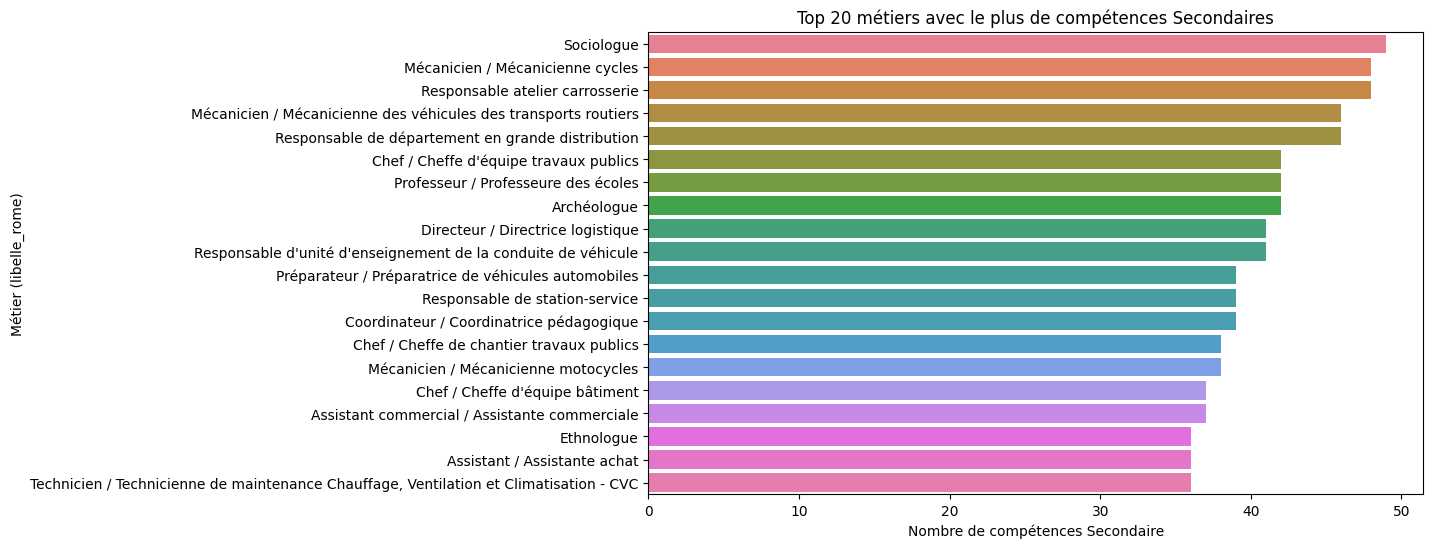

In [55]:
#========================== NaN / Secondaire ===========================
# Filtrer les compétences où coeur_metier == 'Secondaire'
competences_secondaire = df[df['coeur_metier'].isna()] # Secaondaire
# Grouper par code_rome et compter
competences_secondaire_par_metier = competences_secondaire.groupby(['code_rome', 'libelle_rome']).size().reset_index(name='nombre_competences_secondaire')
# Trier et prendre les 10 premiers
top_competence_secondaire = competences_secondaire_par_metier.sort_values(by='nombre_competences_secondaire', ascending=False).head(n_top)
#print(f"\nTop {top_competence_secondaire.shape[0]} métiers avec le plus de compétences 'Secondaire' :")
#print(top_competence_secondaire[['code_rome', 'libelle_rome', 'nombre_competencnombre_competences_secondairees_coeur']])
print("Nombre de compétences NaN ou 'Secondaire' :")
display(competences_secondaire_par_metier.describe())

# Visualisation
plt.figure(figsize=(10, 6))
sns.barplot(data=top_competence_secondaire, x='nombre_competences_secondaire', y='libelle_rome', hue='libelle_rome')
plt.title(f"Top {top_competence_secondaire.shape[0]} métiers avec le plus de compétences Secondaires")
plt.xlabel('Nombre de compétences Secondaire')
plt.ylabel('Métier (libelle_rome)')
plt.show()

### Lecture du résultat:
On remarque qu'au dessus de 75% des métiers le nombre de compétences augmente de manière exponentiel.

In [56]:
# 3.3. Répartition des métiers par emploi_cadre vs non-cadre
# Compter les métiers uniques par statut emploi_cadre
df_tmp = df.copy()
df_tmp['emploi_cadre'] = df['emploi_cadre'].fillna('Ni l\'un ni l\'autre')
repartition_cadre = df_tmp.groupby('emploi_cadre')['code_rome'].nunique().reset_index(name='nombre_metiers')

# Pourcentage
total_metiers = repartition_cadre['nombre_metiers'].sum()
repartition_cadre['pourcentage'] = (repartition_cadre['nombre_metiers'] / total_metiers) * 100
print("Répartition en pourcentage :")
display(repartition_cadre[['emploi_cadre', 'nombre_metiers', 'pourcentage']])

Répartition en pourcentage :


emploi_cadre  nombre_metiers  pourcentage
0                   N             861    54.356061
1  Ni l'un ni l'autre             174    10.984848
2                   O             549    34.659091

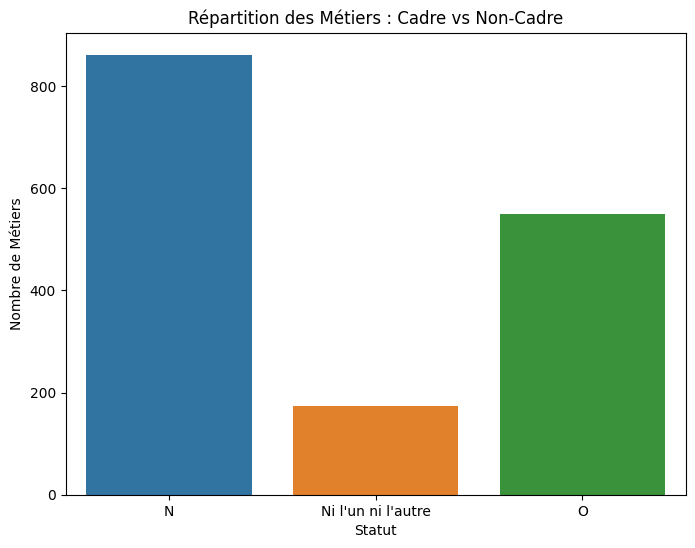

In [57]:
# Visualisation
plt.figure(figsize=(8, 6))
sns.barplot(data=repartition_cadre, x='emploi_cadre', y='nombre_metiers', hue='emploi_cadre')
plt.title('Répartition des Métiers : Cadre vs Non-Cadre')
plt.xlabel('Statut')
plt.ylabel('Nombre de Métiers')
plt.show()

### Lecture du résultat:
- 10.98% des métiers n'ont pas valaur dans la colonne demploi_cadre (=NaN). On suppose qu'ils correspondent aux métiers libéraux ou indépendants.
- Une plus grande proportion des métiers est non cadre.


Métiers dont les compétences ont un impact sur la transition numérique (transition_num_y = 'O') : 949
Métiers dont les compétences n'ont pas d'impact sur la transition numérique (transition_num_y = 'N') : 1578
Métiers dont les compétences sur la transition numérique ne sont pas définies (transition_num_y = NaN) : 1113



Métiers dont les compétences ont un impact sur la transition écologique (transition_eco_y = 'O') : 878
Métiers dont les compétences n'ont pas d'impact sur la transition écologique (transition_eco_y = 'N') : 1345
Métiers dont les compétences sur la transition écologique ne sont pas définies (transition_eco_y = NaN) : 1584


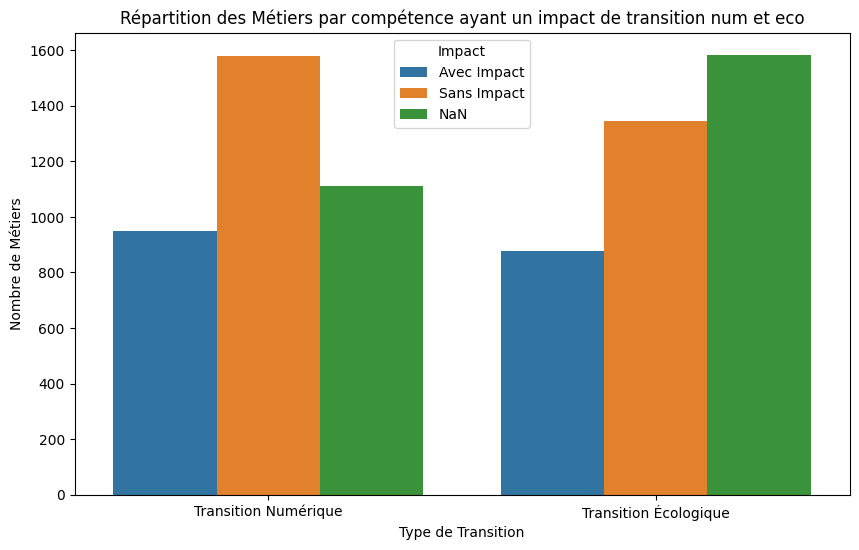

In [58]:
# 3.4. Répartition des métiers par compétence ayant un impact transition (transition_num_y, transition_eco_y)

# Compter les métiers uniques avec transition_num_y = 'O'
metiers_num = df[df['transition_num_y'] == 'O']['code_rome'].nunique()
metiers_non_num = df[df['transition_num_y'] == 'N']['code_rome'].nunique()
metiers_num_na = df[df['transition_num_y'].isna()]['code_rome'].nunique()
print(f"\nMétiers dont les compétences ont un impact sur la transition numérique (transition_num_y = 'O') : {metiers_num}")
print(f"Métiers dont les compétences n'ont pas d'impact sur la transition numérique (transition_num_y = 'N') : {metiers_non_num}")
print(f"Métiers dont les compétences sur la transition numérique ne sont pas définies (transition_num_y = NaN) : {metiers_num_na}")
 
# Compter les métiers uniques avec transition_eco_y = 'O'
metiers_eco = df[df['transition_eco_y'] == 'O']['code_rome'].nunique()
metiers_non_eco = df[df['transition_eco_y'] == 'N']['code_rome'].nunique()
metiers_eco_na = df[df['transition_eco_y'].isna()]['code_rome'].nunique()
print(f"\nMétiers dont les compétences ont un impact sur la transition écologique (transition_eco_y = 'O') : {metiers_eco}")
print(f"Métiers dont les compétences n'ont pas d'impact sur la transition écologique (transition_eco_y = 'N') : {metiers_non_eco}")
print(f"Métiers dont les compétences sur la transition écologique ne sont pas définies (transition_eco_y = NaN) : {metiers_eco_na}")
 
# Visualisation combinée
transition_data = pd.DataFrame({
    'Type': ['Transition Numérique', 'Transition Écologique'],
    'Avec Impact': [metiers_num, metiers_eco],
    'Sans Impact': [metiers_non_num, metiers_non_eco],
    'NaN': [metiers_num_na, metiers_eco_na]
})
transition_data = transition_data.melt(id_vars='Type', 
                                       value_vars=['Avec Impact', 'Sans Impact', 'NaN'], 
                                       var_name='Impact', 
                                       value_name='Nombre de Métiers')
plt.figure(figsize=(10, 6))
sns.barplot(data=transition_data, x='Type', y='Nombre de Métiers', hue='Impact')
plt.title('Répartition des Métiers par compétence ayant un impact de transition num et eco')
plt.xlabel('Type de Transition')
plt.ylabel('Nombre de Métiers')
plt.show()

### Lecture du résultat:
Comme constaté précédemment, les compétences ont trop de valeurs de transition non définie pour pouvoir les utiliser.

### 4. Analyse des compétences

 - Répartition des compétences par catégorie (cat_comp : savoir-faire, savoir etre, connaissance).
 - Répartition des compétences par sous-catégorie (sous_cat_comp).
 - Répartition des compétences par domaine (domaine_competence).
 - Top compétences les plus fréquentes dans les métiers (les plus transversales).

In [59]:
# 4.1: Répartition des compétences par catégorie (cat_comp : savoir-faire, savoir etre, connaissance).
# Comptage des compétences par catégorie
repartition_cat_comp = df['cat_comp'].value_counts(dropna=False).reset_index()
repartition_cat_comp.columns = ['cat_comp', 'nombre_competences']
 
# Pourcentage
repartition_cat_comp['pourcentage'] = (repartition_cat_comp['nombre_competences'] / len(df)) * 100
print("Répartition en pourcentage (cat_comp) :")
display(repartition_cat_comp[['cat_comp', 'nombre_competences', 'pourcentage']])


Répartition en pourcentage (cat_comp) :


cat_comp  nombre_competences  pourcentage
0  Savoir-faire               38961        100.0

In [60]:
# 4.2: Répartition des compétences par sous-catégorie (sous_cat_comp).
# Comptage des compétences par catégorie
repartition_cat_comp = df['sous_cat_comp'].value_counts(dropna=False).reset_index()
repartition_cat_comp.columns = ['sous_cat_comp', 'nombre_sous_competences']
 
# Pourcentage
repartition_cat_comp['pourcentage'] = (repartition_cat_comp['nombre_sous_competences'] / len(df)) * 100
print("Répartition en pourcentage (sous_cat_comp) :")
display(repartition_cat_comp[['sous_cat_comp', 'nombre_sous_competences', 'pourcentage']])

Répartition en pourcentage (sous_cat_comp) :


sous_cat_comp  nombre_sous_competences  pourcentage
0  Technique expert                    16666    42.776109
1         Technique                    16507    42.368009
2        Transverse                     5788    14.855882

### Lecture du résultat:
- L’analyse de la colonne cat_comp montre que 100 % des compétences recensées sont classées comme savoir-faire.
- Les compétences sont réparties en 3 sous-catégories.
- Elles sont majoritairement répartient dans les sous-catégories Technique et Technique expert, représentant 85,13 % des compétences. 
- La sous-catégorie Transverse est moins représentée, ce qui suggère qu’elle regroupe des compétences transversales, applicables à plusieurs métiers ou domaines.
 

In [61]:
# 4.3 Répartition des compétences par domaine (domaine_competence).

Compétences les plus représentées dans les métiers :


nombre_metiers
count    16583.000000
mean         2.349454
std          3.719186
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        177.000000

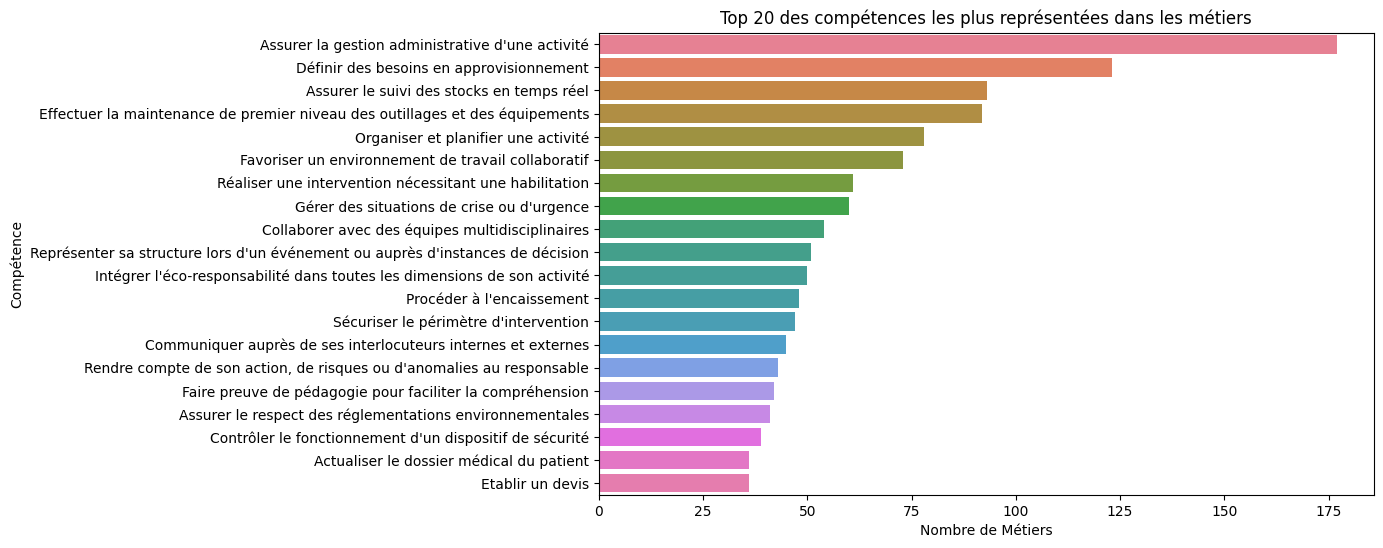

In [62]:
# 4.4. Top compétences les plus fréquentes dans les métiers
# Grouper par code_ogr_competence et libelle_competence, compter les métiers uniques
competences_transversales = df.groupby(['code_ogr_competence', 'libelle_competence'])['code_rome'].nunique().reset_index(name='nombre_metiers')
competences_transversales = df.groupby(['libelle_competence'])['libelle_rome'].nunique().reset_index(name='nombre_metiers')
# Trier et prendre les 10 premières
top_competences_transversales = competences_transversales.sort_values(by='nombre_metiers', ascending=False).head(n_top)
#print("\nTop 10 compétences les plus transversales (présentes dans le plus de métiers) :")
#print(top_competences_transversales[['code_ogr_competence', 'libelle_competence', 'nombre_metiers']])
print(f"Compétences les plus représentées dans les métiers :")
display(competences_transversales.describe())
 
# Visualisation
plt.figure(figsize=(10, 6))
sns.barplot(data=top_competences_transversales, x='nombre_metiers', y='libelle_competence', hue='libelle_competence')
plt.title(f"Top {top_competence_secondaire.shape[0]} des compétences les plus représentées dans les métiers")
plt.xlabel('Nombre de Métiers')
plt.ylabel('Compétence')
plt.show()
 

### Lecture de résultats:
- Sur 16583 compétences, la médiane montre qu'une compétence n'est généralement liée qu'à un seul métier et 75% des compétences apparissent dans deux métiers ou moins. 
- Seule une minorité de compétences très transversales (jusqu'à 177 métiers) représente un socle commun, crucial pour la reconversion professionnelle et l'adaptabilité sur le marché du travail.

### 5. Analyse transition numérique & écologique

- % de compétences numériques par métier.
- % de compétences écologiques par métier.
- Croisement : scatterplot % numérique vs % écologique.
- Identification des métiers en forte transformation (ex. >50% des compétences numériques).

In [63]:
# 5.1. Pourcentage de compétences numériques par métier
# Calculer le nombre total de compétences par métier
total_competences = df.groupby(['code_rome', 'libelle_rome']).size().reset_index(name='total_competences')
# Calculer le nombre de compétences numériques (transition_num_y = 'O')
competences_num = df[df['transition_num_y'] == 'O'].groupby(['code_rome', 'libelle_rome']).size().reset_index(name='competences_num')

# Fusionner et calculer le pourcentage
competences_num = competences_num.merge(total_competences, on=['code_rome', 'libelle_rome'], how='right')
competences_num['pourcentage_num'] = (competences_num['competences_num'] / competences_num['total_competences']) * 100
competences_num['competences_num'] = competences_num['competences_num'].fillna(0)  # Remplacer NaN par 0 pour les métiers sans compétences numériques
competences_num['pourcentage_num'] = competences_num['pourcentage_num'].fillna(0)

# Trier par pourcentage décroissant pour aperçu
#print("\nPourcentage de compétences numériques par métier (extrait des 10 premiers) :")
#print(competences_num.sort_values(by='pourcentage_num', ascending=False)[['code_rome', 'libelle_rome', 'pourcentage_num']].head(10))
display(competences_num.describe())

competences_num  total_competences  pourcentage_num
count      1584.000000        1584.000000      1584.000000
mean          2.259470          24.596591         9.157401
std           4.018935           9.758396        16.359434
min           0.000000           5.000000         0.000000
25%           0.000000          18.000000         0.000000
50%           1.000000          23.000000         3.846154
75%           2.000000          30.000000         9.090909
max          36.000000          82.000000        93.750000

In [64]:
# 5.2. Pourcentage de compétences écologiques par métier
# Calculer le nombre de compétences écologiques (transition_eco_y = 'O')
competences_eco = df[df['transition_eco_y'] == 'O'].groupby(['code_rome', 'libelle_rome']).size().reset_index(name='competences_eco')
# Fusionner et calculer le pourcentage
competences_eco = competences_eco.merge(total_competences, on=['code_rome', 'libelle_rome'], how='right')
competences_eco['pourcentage_eco'] = (competences_eco['competences_eco'] / competences_eco['total_competences']) * 100
competences_eco['competences_eco'] = competences_eco['competences_eco'].fillna(0)  # Remplacer NaN par 0
competences_eco['pourcentage_eco'] = competences_eco['pourcentage_eco'].fillna(0)
# Trier par pourcentage décroissant pour aperçu
#print("\nPourcentage de compétences écologiques par métier (extrait des 10 premiers) :")
#print(competences_eco.sort_values(by='pourcentage_eco', ascending=False)[['code_rome', 'libelle_rome', 'pourcentage_eco']].head(10))
display(competences_eco.describe())

competences_eco  total_competences  pourcentage_eco
count      1584.000000        1584.000000      1584.000000
mean          1.510732          24.596591         5.940697
std           2.563387           9.758396         9.739850
min           0.000000           5.000000         0.000000
25%           0.000000          18.000000         0.000000
50%           1.000000          23.000000         3.225806
75%           2.000000          30.000000         7.430556
max          32.000000          82.000000        84.615385

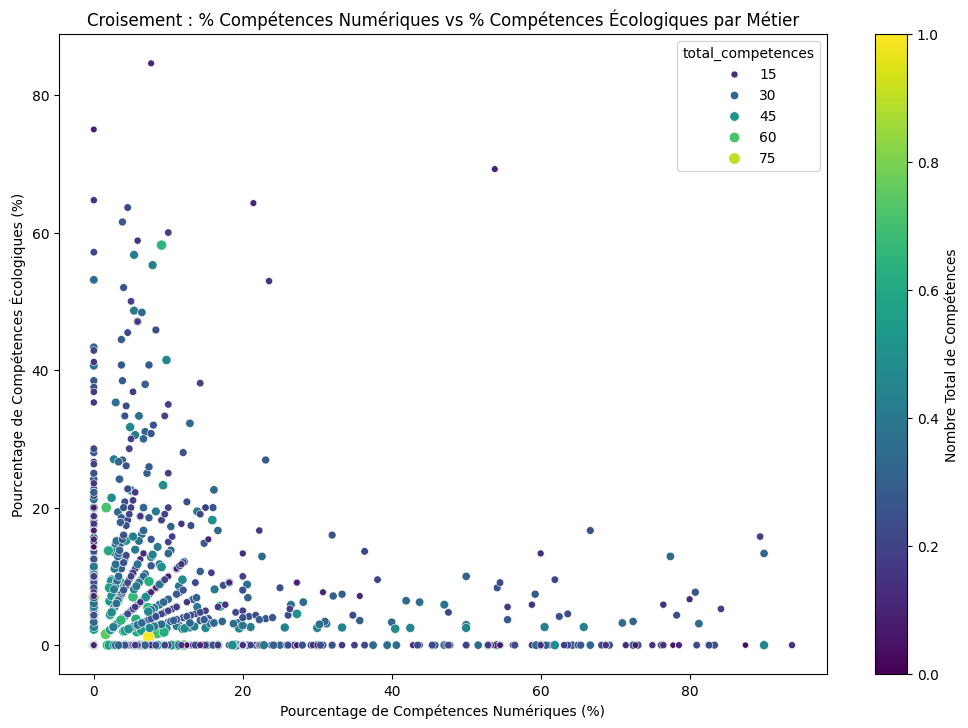

In [65]:
# 5.3. Croisement : Scatterplot % numérique vs % écologique
# Fusionner les données numériques et écologiques, en incluant total_competences
transition_data = competences_num[['code_rome', 'libelle_rome', 'pourcentage_num', 'total_competences']].merge(
    competences_eco[['code_rome', 'libelle_rome', 'pourcentage_eco']],
    on=['code_rome', 'libelle_rome'],
    how='outer'  # Inclure tous les métiers
)
# Créer le scatterplot avec total_competences pour la couleur
plt.figure(figsize=(12, 8))  # Taille augmentée pour plus d'espace
scatter = sns.scatterplot(
    data=transition_data,
    x='pourcentage_num',
    y='pourcentage_eco',
    hue='total_competences',  # Couleur basée sur total_competences
    palette='viridis',  # Palette continue pour les valeurs numériques
    size='total_competences'  # Taille fixe pour tous les points
)
plt.title('Croisement : % Compétences Numériques vs % Compétences Écologiques par Métier')
plt.xlabel('Pourcentage de Compétences Numériques (%)')
plt.ylabel('Pourcentage de Compétences Écologiques (%)')
plt.colorbar(scatter.collections[0], label='Nombre Total de Compétences')  # Ajouter une barre de couleur
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)  # Ajuster les marges manuellement
plt.show()

### Lecture du résultat:
- La majorité des métiers ont peu de compétences numériques ou écologiques. 
- Il n'y a qu'un seul métier hybride qui se démarque (qui apparait sur la diagonale près des 60%).
- Il y a principalement des métiers spécialisés qui se composent soit de compétences numériques, soit de compétences écologiques.


In [66]:
# Recherche du métier isolé (sur la diagonale)
df_transition = transition_data.copy()
df_transition['ecart_num_eco'] = abs(df_transition['pourcentage_num'] - df_transition['pourcentage_eco'])

df_transition['moyene_num_eco'] = (df_transition['pourcentage_num'] + df_transition['pourcentage_eco']) / 2

df_diag = df_transition[df_transition['ecart_num_eco'] < 5]
metier_isole = df_diag.sort_values('moyene_num_eco', ascending= False).head(1)

display(metier_isole[['libelle_rome', 'pourcentage_num', 'pourcentage_eco', 'total_competences']])

libelle_rome  pourcentage_num  \
1485  Spécialiste en modélisation climatique        23.076923   

      pourcentage_eco  total_competences  
1485        26.923077                 26

-> Le métier isolé est: 'Spécialiste en modélisation climatique'

In [67]:
# 5.4. Identification des métiers en forte transformation (>50% compétences numériques)
# Filtrer les métiers avec >50% de compétences numériques
metiers_forte_transformation_num = transition_data[transition_data['pourcentage_num'] > 50]
print(f"\nMétiers avec >50% de compétences numériques ({len(metiers_forte_transformation_num)} métiers) :")
display(metiers_forte_transformation_num[['code_rome', 'libelle_rome', 'pourcentage_num']].sort_values(by='pourcentage_num', ascending=False))

# Optionnel : Métiers avec >50% de compétences écologiques
metiers_forte_transformation_eco = transition_data[transition_data['pourcentage_eco'] > 50]
print(f"\nMétiers avec >50% de compétences écologiques ({len(metiers_forte_transformation_eco)} métiers) :")
display(metiers_forte_transformation_eco[['code_rome', 'libelle_rome', 'pourcentage_eco']].sort_values(by='pourcentage_eco', ascending=False))
 
# Optionnel : Métiers avec >50% pour les deux (numérique ET écologique)
metiers_forte_transformation_both = transition_data[(transition_data['pourcentage_num'] > 50) & (transition_data['pourcentage_eco'] > 50)]
print(f"\nMétiers avec >50% de compétences numériques ET écologiques ({len(metiers_forte_transformation_both)} métiers) :")
display(metiers_forte_transformation_both[['code_rome', 'libelle_rome', 'pourcentage_num', 'pourcentage_eco']])


Métiers avec >50% de compétences numériques (83 métiers) :


code_rome  \
1479     M1882   
1476     M1879   
1483     M1886   
1473     M1876   
1453     M1856   
1407     M1810   
1445     M1848   
1452     M1855   
1484     M1887   
1491     M1894   
1472     M1875   
1469     M1872   
1468     M1871   
1462     M1865   
1263     L1507   
1481     M1884   
1123     K1906   
1457     M1860   
1463     M1866   
1434     M1837   
1474     M1877   
1470     M1873   
1402     M1805   
1441     M1844   
1418     M1821   
1444     M1847   
1338     M1423   
1480     M1883   
1430     M1833   
1428     M1831   
1446     M1849   
1415     M1818   
1398     M1801   
1447     M1850   
1414     M1817   
1438     M1841   
1416     M1819   
1486     M1889   
286      E1104   
1465     M1868   
1466     M1869   
306      E1124   
1471     M1874   
1431     M1834   
1436     M1839   
283      E1101   
309      E1127   
343      E1406   
1440     M1843   
853      I1405   
1478     M1881   
1403     M1806   
1461     M1864   
1451     M1854   
849      I1401   
293      E1111   
342      E1405   
1427     M1830   
1442     M1845   
1421     M1824   
1458     M1861   
301      E1119   
1424     M1827   
1400     M1803   
1460     M1863   
1411     M1814   
1475     M1878   
307      E1125   
339      E1402   
1439     M1842   
1443     M1846   
852      I1404   
295      E1113   
1399     M1802   
1420     M1823   
1341     M1426   
271      D1438   
570      H1106   
1325     M1410   
1329     M1414   
1419     M1822   
1449     M1852   
321      E1210   

                                                                        libelle_rome  \
1479                                                Architecte sécurité informatique   
1476                                          Ingénieur / Ingénieure Cloud computing   
1483                                                     Chef / Cheffe de projet Web   
1473                                                 Technicien / Technicienne Cloud   
1453                                               Expert / Experte en cybersécurité   
1407                           Technicien / Technicienne d'exploitation informatique   
1445                                  Analyste Concepteur / Conceptrice informatique   
1452                                                  Développeur / Développeuse web   
1484                                                         Product builder no code   
1491                                                 Gestionnaire de base de données   
1472  Coordinateur / Coordinatrice Maitrise d'Ouvrage Système d'Information (MOA SI)   
1469      Consultant décisionnel / Consultante décisionnelle - Business Intelligence   
1468                               Gestionnaire d'applications système d'information   
1462                                               Ingénieur / Ingénieure blockchain   
1263                                                        Monteur / Monteuse vidéo   
1481               Ingénieur / Ingénieure systèmes, réseaux et sécurité informatique   
1123        Délégué / Déléguée à la protection des données - Data Protection Officer   
1457                                                                Architecte cloud   
1463                                                        Pentesteur / Pentesteuse   
1434                                           Développeur / Développeuse multimédia   
1474                                           Développeur / Développeuse blockchain   
1470                                                        Spécialiste IA embarquée   
1402                                         Développeur / Développeuse informatique   
1441                                                       Analyste en cybersécurité   
1418                                             Analyste d'application informatique   
1444                                    Expert / Experte en communication et réseaux   
1338                                                              Chief Data Officer   
1480                        


Métiers avec >50% de compétences écologiques (16 métiers) :


code_rome  \
1189     K2309   
1188     K2308   
1325     M1410   
495      G1231   
1184     K2304   
617      H1304   
28       A1313   
376      F1124   
1328     M1413   
1115     K1813   
11       A1210   
26       A1311   
22       A1307   
68       A1440   
1190     K2310   
21       A1306   

                                                                    libelle_rome  \
1189                           Technicien / Technicienne réutilisation recyclage   
1188             Opérateur / Opératrice de tri en récupération et revalorisation   
1325                                                        Responsable Green IT   
495                              Accompagnateur / Accompagnatrice en écotourisme   
1184                                           Agent / Agente de tri des déchets   
617                                       Responsable environnement en industrie   
28                                     Chargé / Chargée de mission environnement   
376                                                                   Hydrologue   
1328  Chargé / Chargée de mission RSE - Responsabilité Sociétale de l'Entreprise   
1115                                  Chargé / Chargée de mission eaux pluviales   
11                                       Ouvrier forestier / Ouvrière forestière   
26                                Technicien forestier / Technicienne forestière   
22                                   Ingénieur forestier / Ingénieure forestière   
68                                     Cultivateur urbain / Cultivatrice urbaine   
1190                                           Ambassadeur / Ambassadrice du tri   
21                                      Chargé / Chargée de mission biodiversité   

      pourcentage_eco  
1189        84.615385  
1188        75.000000  
1325        69.230769  
495         64.705882  
1184        64.285714  
617         63.636364  
28          61.538462  
376         60.000000  
1328        58.823529  
1115        58.181818  
11          57.142857  
26          56.756757  
22          55.263158  
68          53.125000  
1190        52.941176  
21          52.000000


Métiers avec >50% de compétences numériques ET écologiques (1 métiers) :


code_rome          libelle_rome  pourcentage_num  pourcentage_eco
1325     M1410  Responsable Green IT        53.846154        69.230769

### 6. Analyse des relations métiers <-> compétences
- Distribution du nombre de métiers par compétence (une compétence peut appartenir à plusieurs métiers).
- Identification des compétences transversales (présentes dans beaucoup de métiers).
- Graphe biparti : métiers (noeuds bleus) ↔ compétences (noeuds verts).   --->> (Histogramme "nb de métiers par compétence".)

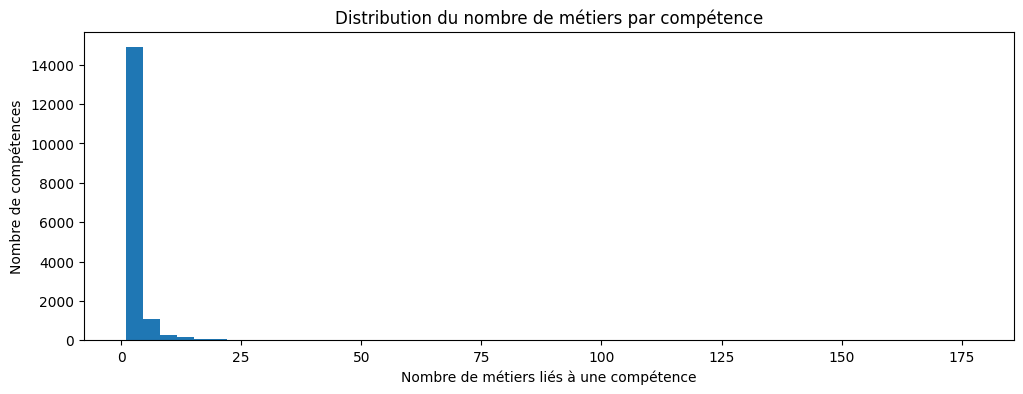

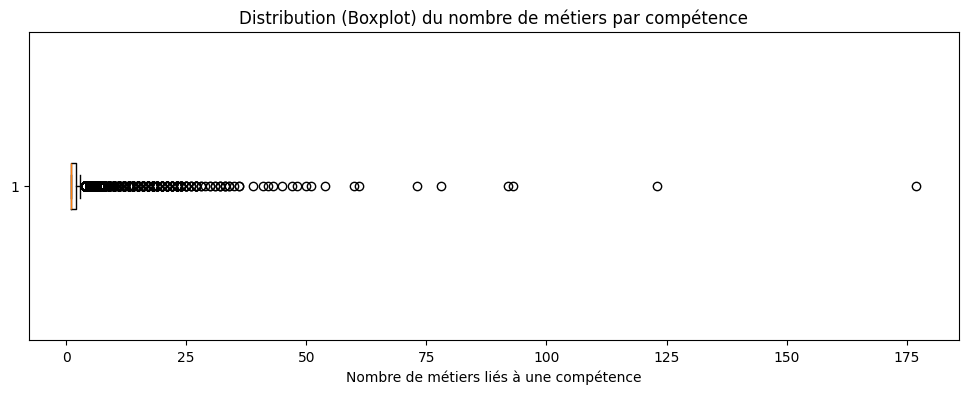

In [68]:
# 6.1. Distribution du nombre de métiers par compétence (une compétence peut appartenir à plusieurs métiers).

# Nombre de métiers uniques par compétence
comp_metiers = df.groupby("libelle_competence")["code_rome"].nunique().reset_index()
comp_metiers = comp_metiers.rename(columns={"code_rome": "nb_metiers"})
comp_metiers = comp_metiers.sort_values(by="nb_metiers", ascending=False)
 
# Graph
plt.figure(figsize=(12,4))
plt.hist(comp_metiers["nb_metiers"], bins=50)
plt.xlabel("Nombre de métiers liés à une compétence")
plt.ylabel("Nombre de compétences")
plt.title("Distribution du nombre de métiers par compétence")
plt.show()
 
plt.figure(figsize=(12,4))
plt.boxplot(comp_metiers["nb_metiers"], vert=False)
plt.xlabel("Nombre de métiers liés à une compétence")
plt.title("Distribution (Boxplot) du nombre de métiers par compétence")
plt.show()

### Lecture du résultat:
Les deux graphiques nous indiquent une répartition non homogène de la distribution du nombre de métiers par compétence :
- La boîte centrale correspond aux 50% des compétences les plus représentatives, autour de la médiane.
- Les moustaches montrent l’étendue des compétences les moins et les plus liées à des métiers.
- Les points isolés (outliers) indiquent les compétences très transversales, présentes dans un grand nombre de métiers.
- L'histogramme montre que la plupart des compétences sont réparties dans peu de métiers.
- Ce graphique permet d’identifier rapidement qu'il y a des compétences transversales qui apparaissent dans de nombreux métiers.

In [69]:
# 6.2. Identification des compétences transversales (présentes dans beaucoup de métiers).
print("Compétences transversales :")
display(comp_metiers.head(n_top))



Compétences transversales :


libelle_competence  \
1964                                 Assurer la gestion administrative d'une activité   
5096                                         Définir des besoins en approvisionnement   
2419                                        Assurer le suivi des stocks en temps réel   
5929     Effectuer la maintenance de premier niveau des outillages et des équipements   
10977                                             Organiser et planifier une activité   
7380                               Favoriser un environnement de travail collaboratif   
14181                          Réaliser une intervention nécessitant une habilitation   
7781                                       Gérer des situations de crise ou d'urgence   
2788                                  Collaborer avec des équipes multidisciplinaires   
12964  Représenter sa structure lors d'un événement ou auprès d'instances de décision   
9201         Intégrer l'éco-responsabilité dans toutes les dimensions de son activité   
11862                                                       Procéder à l'encaissement   
15565                                           Sécuriser le périmètre d'intervention   
2934                    Communiquer auprès de ses interlocuteurs internes et externes   
12857           Rendre compte de son action, de risques ou d'anomalies au responsable   
7325                        Faire preuve de pédagogie pour faciliter la compréhension   
2348                         Assurer le respect des réglementations environnementales   
4320                          Contrôler le fonctionnement d'un dispositif de sécurité   
151                                          Actualiser le dossier médical du patient   
6543                                                                 Etablir un devis   

       nb_metiers  
1964          177  
5096          123  
2419           93  
5929           92  
10977          78  
7380           73  
14181          61  
7781           60  
2788           54  
12964          51  
9201           50  
11862          48  
15565          47  
2934           45  
12857          43  
7325           42  
2348           41  
4320           39  
151            36  
6543           36

### Lecture du résultat :
'Assurer la gestion administrative d'une activité' et 'Définir des besoins en approvisionnement' sont les 2 métiers qui demandent le plus de compétences.

📌 Compétences dans 1 métier : 9533 (57.49%)
📌 Compétences dans 2 métiers : 3205 (19.33%)
📌 Compétences dans 3-5 métiers : 2612 (15.75%)
📌 Compétences dans 6-10 métiers : 835 (5.04%)
📌 Compétences dans 11-20 métiers : 305 (1.84%)
📌 Compétences dans 21-50 métiers : 83 (0.50%)
📌 Compétences dans 51+ métiers : 10 (0.06%)
Compétences présentes dans 50 métiers :
Intégrer l'éco-responsabilité dans toutes les dimensions de son activité


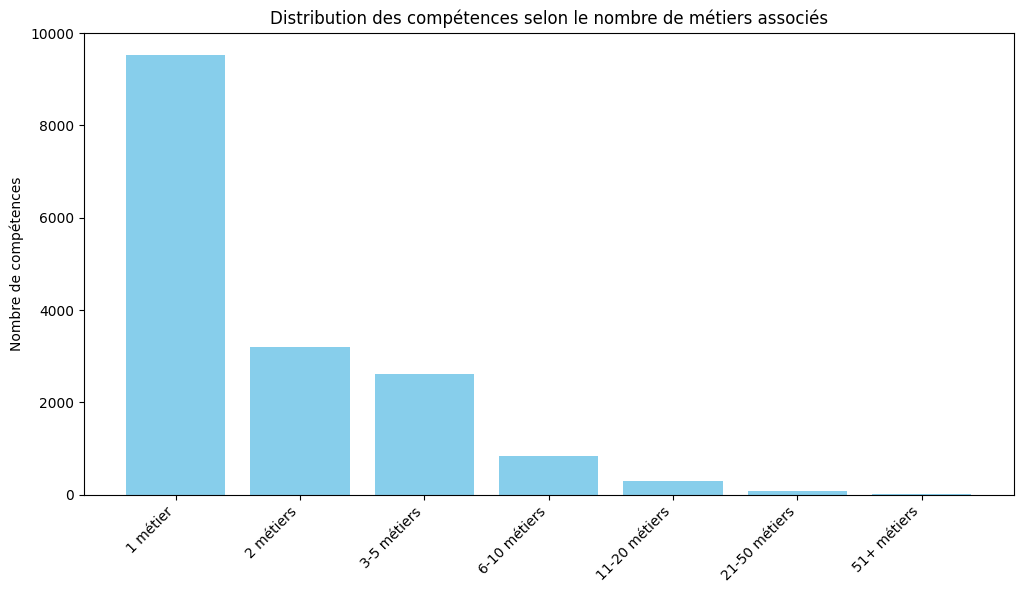

In [70]:
# Nombre de métiers par compétence
comp_metiers = df.groupby("libelle_competence")["code_rome"].nunique().reset_index()
comp_metiers = comp_metiers.rename(columns={"code_rome": "nb_metiers"})
 
# Définir les tranches
tranches = {
    "1 métier": (1, 1),
    "2 métiers": (2, 2),
    "3-5 métiers": (3, 5),
    "6-10 métiers": (6, 10),
    "11-20 métiers": (11, 20),
    "21-50 métiers": (21, 50),
    "51+ métiers": (51, comp_metiers["nb_metiers"].max())
}
 
total_comp = comp_metiers.shape[0]
 
# Calculer le nombre et pourcentage par tranche
for label, (min_m, max_m) in tranches.items():
    count = comp_metiers[(comp_metiers["nb_metiers"] >= min_m) & (comp_metiers["nb_metiers"] <= max_m)].shape[0]
    pct = count / total_comp * 100
    print(f"📌 Compétences dans {label} : {count} ({pct:.2f}%)")
 
# Filtrer les compétences présentes dans exactement 50 métiers
comp_5_metiers = comp_metiers[comp_metiers["nb_metiers"] == 50]
 
# Afficher les libellés
libelles_5_metiers = comp_5_metiers["libelle_competence"].tolist()
print("Compétences présentes dans 50 métiers :")
for comp in libelles_5_metiers:
    print(comp)

# Préparer les données pour le graphique
labels = []
counts = []
 
for label, (min_m, max_m) in tranches.items():
    count = comp_metiers[(comp_metiers["nb_metiers"] >= min_m) & (comp_metiers["nb_metiers"] <= max_m)].shape[0]
    labels.append(label)
    counts.append(count)
 
# Création du bar plot
plt.figure(figsize=(12,6))
plt.bar(labels, counts, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Nombre de compétences")
plt.title("Distribution des compétences selon le nombre de métiers associés")
plt.show()

### Lecture du résultat :
- La plupart des compétences (57.49%) sont représentées dans un seul métier.
- Peu de compétences (7,42%) sont présentent dans plus de 6 métiers.

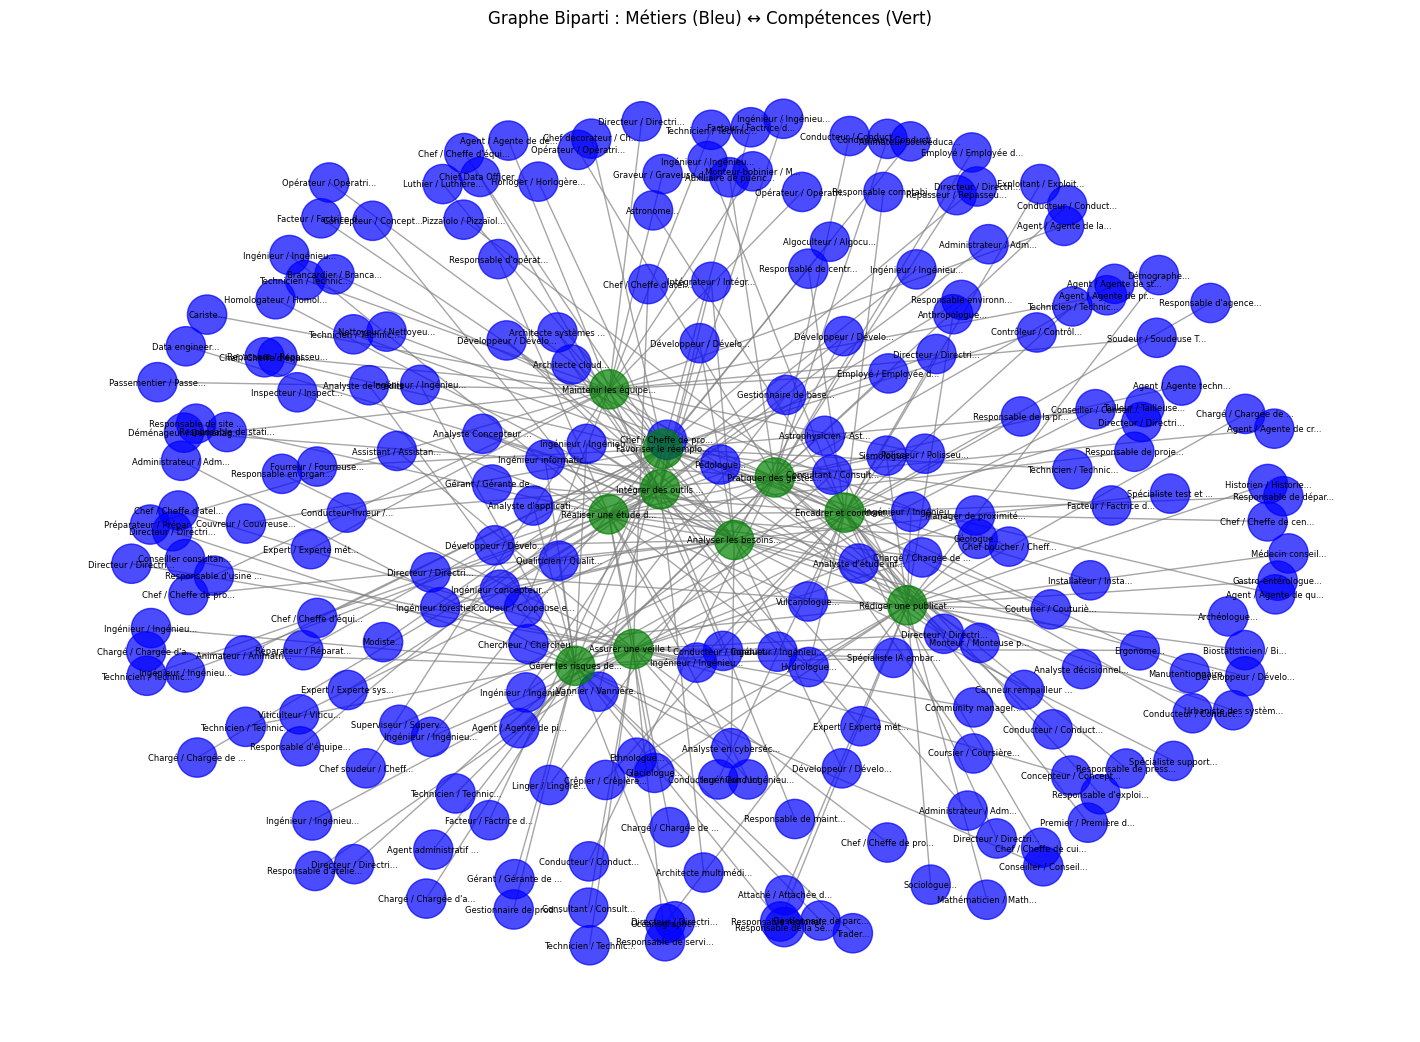

In [71]:
# 6.3. Graphe biparti : métiers (noeuds bleus) ↔ compétences (noeuds verts).   --->> (Histogramme "nb de métiers par compétence".)
# Calcul des compétences transversales (grouper par compétence et compter les métiers uniques)
competences_transversales = df.groupby(['code_ogr_competence', 'libelle_competence'])['code_rome'].nunique().reset_index(name='nombre_metiers').sort_values('nombre_metiers', ascending=False)
 
# Créer un sous-ensemble pour le graphe (top 5 compétences transversales et leurs métiers)
top_competences = competences_transversales.head(50).tail(10)['code_ogr_competence'].tolist()
subset_df = df[df['code_ogr_competence'].isin(top_competences)][['code_rome', 'libelle_rome', 'code_ogr_competence', 'libelle_competence']]
 
# Créer le graphe biparti
G = nx.Graph()
# Ajouter les nœuds métiers (bleus)
metiers = subset_df['code_rome'].unique()
G.add_nodes_from(metiers, bipartite=0, node_type='metier')
# Ajouter les nœuds compétences (verts)
competences = subset_df['code_ogr_competence'].unique()
G.add_nodes_from(competences, bipartite=1, node_type='competence')
# Ajouter les arêtes (relations métier-compétence)
edges = subset_df[['code_rome', 'code_ogr_competence']].values
G.add_edges_from(edges)
 
# Visualisation du graphe biparti avec améliorations
plt.figure(figsize=(14, 10))  # Taille augmentée pour plus d'espace
pos = nx.spring_layout(G, k=0.5, iterations=50)  # Disposition spring pour meilleur espacement
node_colors = ['blue' if G.nodes[node]['node_type'] == 'metier' else 'green' for node in G.nodes()]
nx.draw(G, pos, node_color=node_colors, node_size=800, edge_color='gray', alpha=0.7)  # Arêtes transparentes
# Ajouter des étiquettes abrégées pour les nœuds
labels = {node: df[df['code_rome'] == node]['libelle_rome'].iloc[0][:20] + '...' if node in metiers else df[df['code_ogr_competence'] == node]['libelle_competence'].iloc[0][:20] + '...' for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_size=6, font_color='black')  # Police réduite
plt.title('Graphe Biparti : Métiers (Bleu) ↔ Compétences (Vert)')
plt.axis('off')  # Supprimer les axes pour un aspect plus propre
plt.show()

### Lecture du résultat :
Il y a de belles liaisons en forme de feu d'artifice mais ça manque de rouge.

### 7. Analyse hiérarchique (arborescence)
 - Répartition des compétences par domaine (domaine_competence).
 - Répartition des compétences par enjeu (enjeu)
 - Répartition des compétences par objectif (objectif)
 - Répartition des compétences par macro-competence (macro-competence)
 - Mapping domaine → compétences principales (cat_comp).--> treemap (Domaine → Enjeu → Objectif → Compétence).


Répartition en pourcentage (domaine_competence) :


domaine_competence  \
0                  Production, Construction, Qualité, Logistique   
1                                       Management, Social, Soin   
2                         Pilotage, Gestion, Cadre réglementaire   
3    Communication, Création, Innovation, Nouvelles technologies   
4                                       Développement économique   
5  Coopération, Organisation et Développement de ses compétences   

   nombre_competences  pourcentage  
0               13160        33.78  
1                5522        14.17  
2                5227        13.42  
3                5153        13.23  
4                5113        13.12  
5                4786        12.28

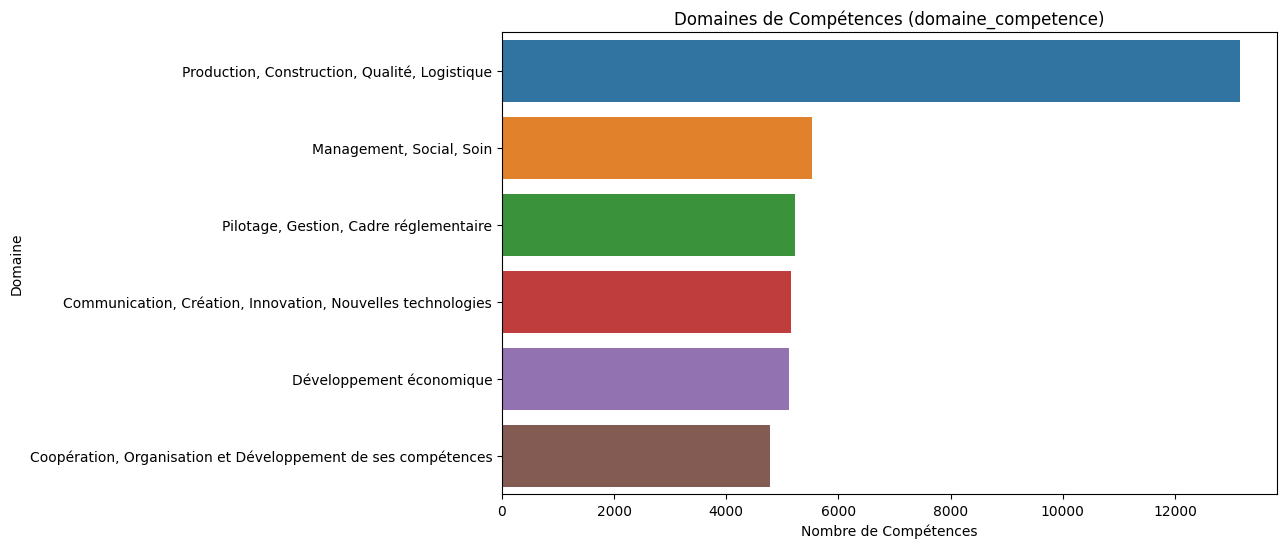

In [72]:
# 7.1. Répartition des compétences par domaine (domaine_competence)
repartition_domaine = df['domaine_competence'].value_counts(dropna=False).reset_index()
repartition_domaine.columns = ['domaine_competence', 'nombre_competences']

# Pourcentage
repartition_domaine['pourcentage'] = (repartition_domaine['nombre_competences'] / len(df)) * 100
repartition_domaine['pourcentage'] = repartition_domaine['pourcentage'].round(2)
print("\nRépartition en pourcentage (domaine_competence) :")
display(repartition_domaine[['domaine_competence', 'nombre_competences', 'pourcentage']])
 
# Visualisation
plt.figure(figsize=(10, 6))
sns.barplot(data=repartition_domaine.head(10), x='nombre_competences', y='domaine_competence', hue='domaine_competence')
plt.title('Domaines de Compétences (domaine_competence)')
plt.xlabel('Nombre de Compétences')
plt.ylabel('Domaine')
plt.show()
 

### Lecture du résultat :
 - Il y a 6 domaines de compétences différents.
 - **'Production, Construction, Qualité, Logistique'** est le domaine qui contient le plus de compétences (13160 soit 33,78%).
 - **'Coopération, Organisation et Développement de ses compétences'** est celui qui en compte le moins (4788 soit 12,28%)

Répartition des 31 enjeux :


enjeu_competence  nombre_competences  \
0                          Production, Fabrication                2838   
1                          Maintenance, Réparation                2492   
2                                     Organisation                2448   
3                           Prévention des risques                2348   
4                   Data et Nouvelles technologies                2301   
5                       Stratégie de développement                2201   
6                                    Communication                2094   
7                            Conseil, Transmission                1857   
8                         Développement commercial                1763   
9                                          Qualité                1553   
10                                      Management                1527   
11                           Recherche, Innovation                1481   
12                                            Soin                1414   
13  Protection des personnes et de l'environnement                1190   
14             Gestion administrative et comptable                1162   
15                                 Relation client                1149   
16                                    Construction                1092   
17               Droit, contentieux et négociation                1057   
18                       Communication, Multimédia                1054   
19                              Gestion des stocks                1037   
20                  Pilotage et maîtrise des coûts                 827   
21                             Gestion et contrôle                 790   
22                                      Conception                 543   
23                                      Logistique                 465   
24                                     Aménagement                 403   
25                                       Transport                 389   
26                 Gestion des Ressources Humaines                 388   
27                                       Animation                 336   
28                             Création artistique                 317   
29                   Développement des compétences                 244   
30                                 Action publique                 201   

    pourcentage  
0          7.28  
1          6.40  
2          6.28  
3          6.03  
4          5.91  
5          5.65  
6          5.37  
7          4.77  
8          4.53  
9          3.99  
10         3.92  
11         3.80  
12         3.63  
13         3.05  
14         2.98  
15         2.95  
16         2.80  
17         2.71  
18         2.71  
19         2.66  
20         2.12  
21         2.03  
22         1.39  
23         1.19  
24         1.03  
25         1.00  
26         1.00  
27         0.86  
28         0.81  
29         0.63  
30         0.52

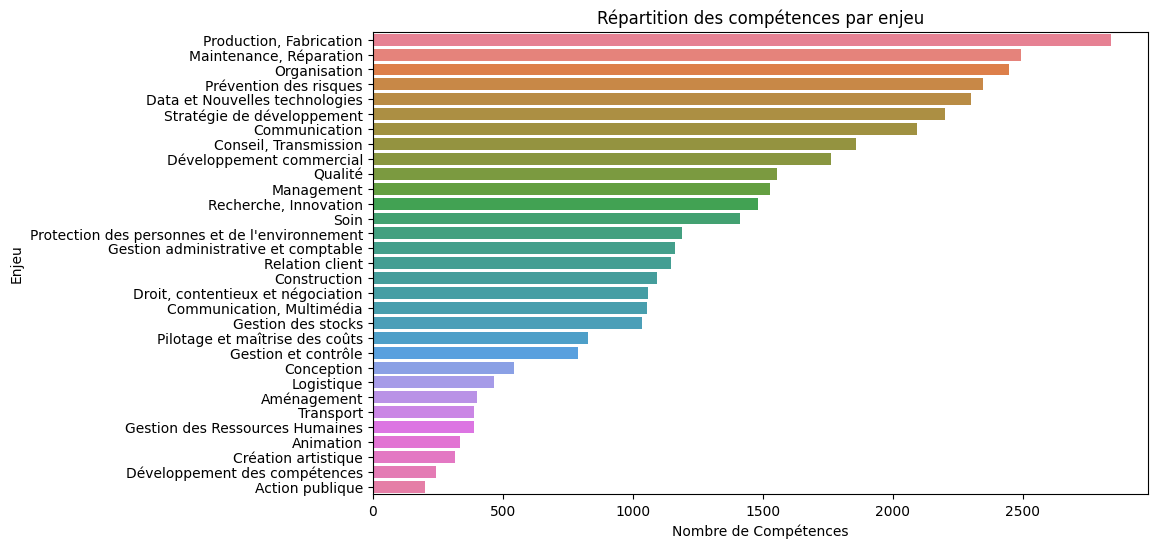

In [73]:
# 7.2. Répartition des compétences par enjeu
repartition_enjeu = df['enjeu'].value_counts(dropna=False).reset_index()
repartition_enjeu.columns = ['enjeu_competence', 'nombre_competences']
 
# Pourcentage
repartition_enjeu['pourcentage'] = (repartition_enjeu['nombre_competences'] / len(df)) * 100
repartition_enjeu['pourcentage'] = repartition_enjeu['pourcentage'].round(2)
print(f"Répartition des {nb_enjeu} enjeux :")
display(repartition_enjeu[['enjeu_competence', 'nombre_competences', 'pourcentage']])
 
# Visualisation
plt.figure(figsize=(10, 6))
sns.barplot(data=repartition_enjeu, x='nombre_competences', y='enjeu_competence', hue='enjeu_competence')
plt.title('Répartition des compétences par enjeu')
plt.xlabel('Nombre de Compétences')
plt.ylabel('Enjeu')
plt.show()

### Lecture du résultat:
La répartition des compétences par enjeu montre que les 5 principaux enjeux qui sont: 'Production, Fabrication' (2838 compétences, soit 7,28 %), 'Maintenance, Réparation' (2492, soit 6,40 %), 'Organisation' (2448, soit 6,28 %), 'Prévention des risques' (2348, soit 6,03 %) et 'Data et Nouvelles technologies' (2301, soit 5,91 %) représentent ensemble 12 427 compétences, soit près de 32 % du total.  
Cette concentration indique que près d’un tiers des compétences recensées se concentre sur un petit nombre d’enjeux.

Répartition en pourcentage pour les 20 premiers objectifs (sur 83) :


objectif_competence  \
0                                        Analyser, prévenir les risques   
1                      Analyser et structurer des données, informations   
2                                      Assurer la maintenance technique   
3                              Collaborer et favoriser la collaboration   
4                                                  Respecter les règles   
5                      Mettre en oeuvre des procédés, modes opératoires   
6                                     Assurer la gestion administrative   
7                                                  Contrôler la qualité   
8                            Manipuler des produits, matières premières   
9                                              Protéger l'environnement   
10                   Expérimenter, piloter la recherche et l'innovation   
11  Gérer la relation client, recueillir et analyser les besoins client   
12                                         Maîtriser les coûts, acheter   
13                                                  Animer un collectif   
14                                                           Construire   
15                                      Piloter un projet, une activité   
16                              Conduire une stratégie de développement   
17                                                   Manager une équipe   
18                                                 Entretenir, corriger   
19                                             Traiter des informations   

    nombre_competences  pourcentage  
0                 1677         4.30  
1                 1338         3.43  
2                 1326         3.40  
3                 1200         3.08  
4                 1050         2.70  
5                 1043         2.68  
6                  996         2.56  
7                  974         2.50  
8                  961         2.47  
9                  930         2.39  
10                 894         2.29  
11                 869         2.23  
12                 827         2.12  
13                 812         2.08  
14                 769         1.97  
15                 755         1.94  
16                 733         1.88  
17                 715         1.84  
18                 707         1.81  
19                 706         1.81

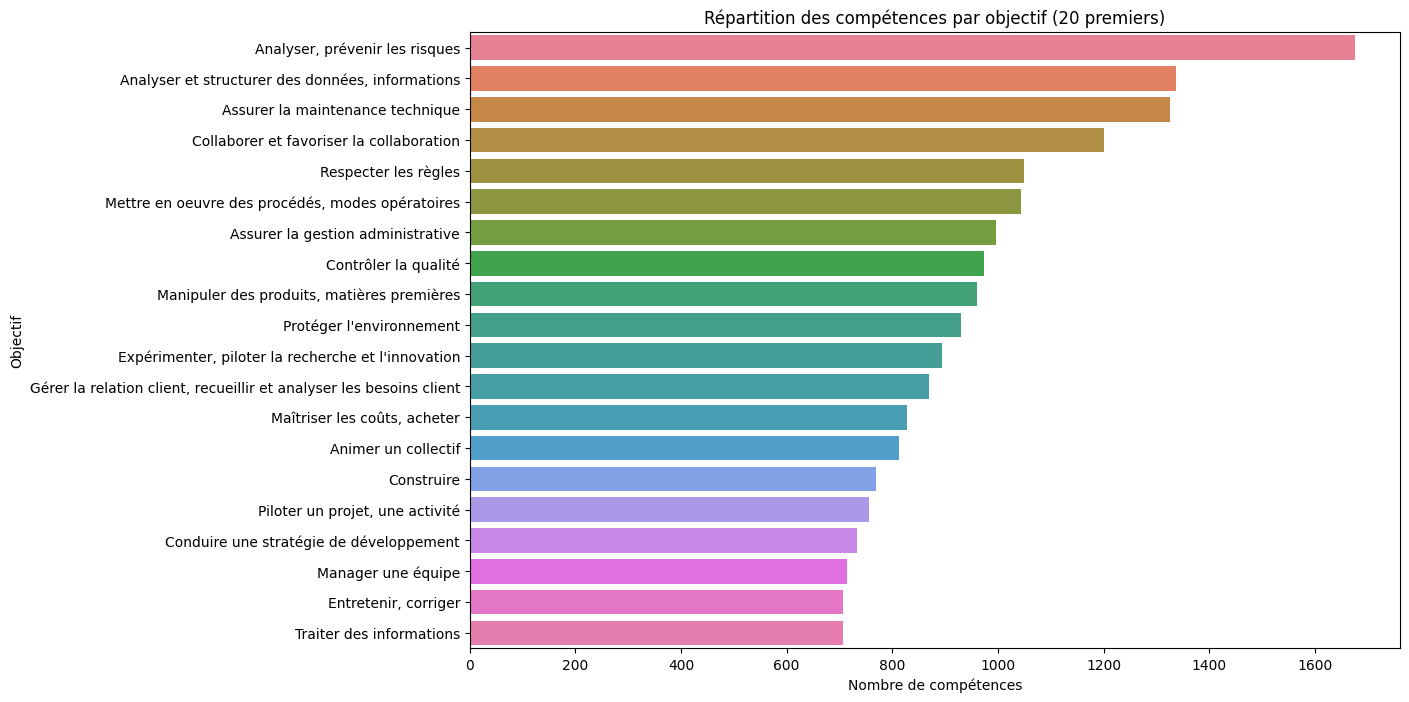

In [74]:
# 7.3. Répartition des compétences par objectif
repartition_objectif = df['objectif'].value_counts(dropna=False).reset_index()
repartition_objectif.columns = ['objectif_competence', 'nombre_competences']
 
# Describe pour résumé statistique
# Pourcentage
repartition_objectif['pourcentage'] = (repartition_objectif['nombre_competences'] / len(df)) * 100
repartition_objectif['pourcentage'] = repartition_objectif['pourcentage'].round(2)
print(f"Répartition en pourcentage pour les 20 premiers objectifs (sur {nb_objectif}) :")
display(repartition_objectif[['objectif_competence', 'nombre_competences', 'pourcentage']].head(20))
 
# Visualisation des 20 premiers objectifs
plt.figure(figsize=(12, 8))
sns.barplot(data=repartition_objectif.head(20), x='nombre_competences', y='objectif_competence', hue='objectif_competence', dodge=False)
plt.title('Répartition des compétences par objectif (20 premiers)')
plt.xlabel('Nombre de compétences')
plt.ylabel('Objectif')
plt.legend([],[], frameon=False)
plt.show()

### Lecture du résultat :
Les 5 objectifs les plus représentés concentrent plus de 1000 compétences chacun, avec un total cumulé de 7 634 compétences, soit 16,5 % du total : 'Analyser, prévenir les risques' : 1677 compétences (4,30 %), 'Analyser et structurer des données, informations' : 1338 compétences (3,43 %), 'Assurer la maintenance technique' : 1326 compétences (3,40 %), 'Collaborer et favoriser la collaboration' : 1200 compétences (3,08 %), 'Respecter les règles' : 1050 compétences (2,70 %)

Répartition des 20 premières macro-compétences (sur 487) :


macro_competence  \
0                               Evaluer, prévenir, et gérer les risques et la sécurité   
1                                                                     Gérer les stocks   
2                               Définir et mettre en oeuvre des protocoles de sécurité   
3                                       Rédiger un rapport, un compte rendu d'activité   
4                                                     Réaliser un diagnostic technique   
5                          Développer et piloter un réseau d'organisations partenaires   
6   Respecter les règles de Qualité, Hygiène, Sécurité, Santé et Environnement (QHSSE)   
7                                                Réaliser une opération de maintenance   
8                              Entretenir un équipement, une machine, une installation   
9    Contrôler et faire appliquer le respect de dispositions légales et réglementaires   
10                                        Communiquer à l'oral en milieu professionnel   
11           Respecter des règles, des consignes, normes et procédures opérationnelles   
12                                                       Gérer une situation d'urgence   
13                                Réduire l'empreinte environnementale de son activité   
14      Contrôler le fonctionnement d'un équipement, d'une machine, d'une installation   
15                                  Contrôler la qualité et la conformité d'un produit   
16                      Assurer la gestion administrative et financière d'une activité   
17                  Mettre en oeuvre les processus et les modes opératoires techniques   
18                                         Analyser, exploiter, structurer des données   
19                                                  Utiliser des logiciels spécifiques   

    nombre_competences  pourcentage  
0                  732         1.88  
1                  574         1.47  
2                  457         1.17  
3                  426         1.09  
4                  390         1.00  
5                  374         0.96  
6                  368         0.94  
7                  362         0.93  
8                  361         0.93  
9                  360         0.92  
10                 348         0.89  
11                 342         0.88  
12                 342         0.88  
13                 336         0.86  
14                 335         0.86  
15                 331         0.85  
16                 319         0.82  
17                 313         0.80  
18                 312         0.80  
19                 294         0.75

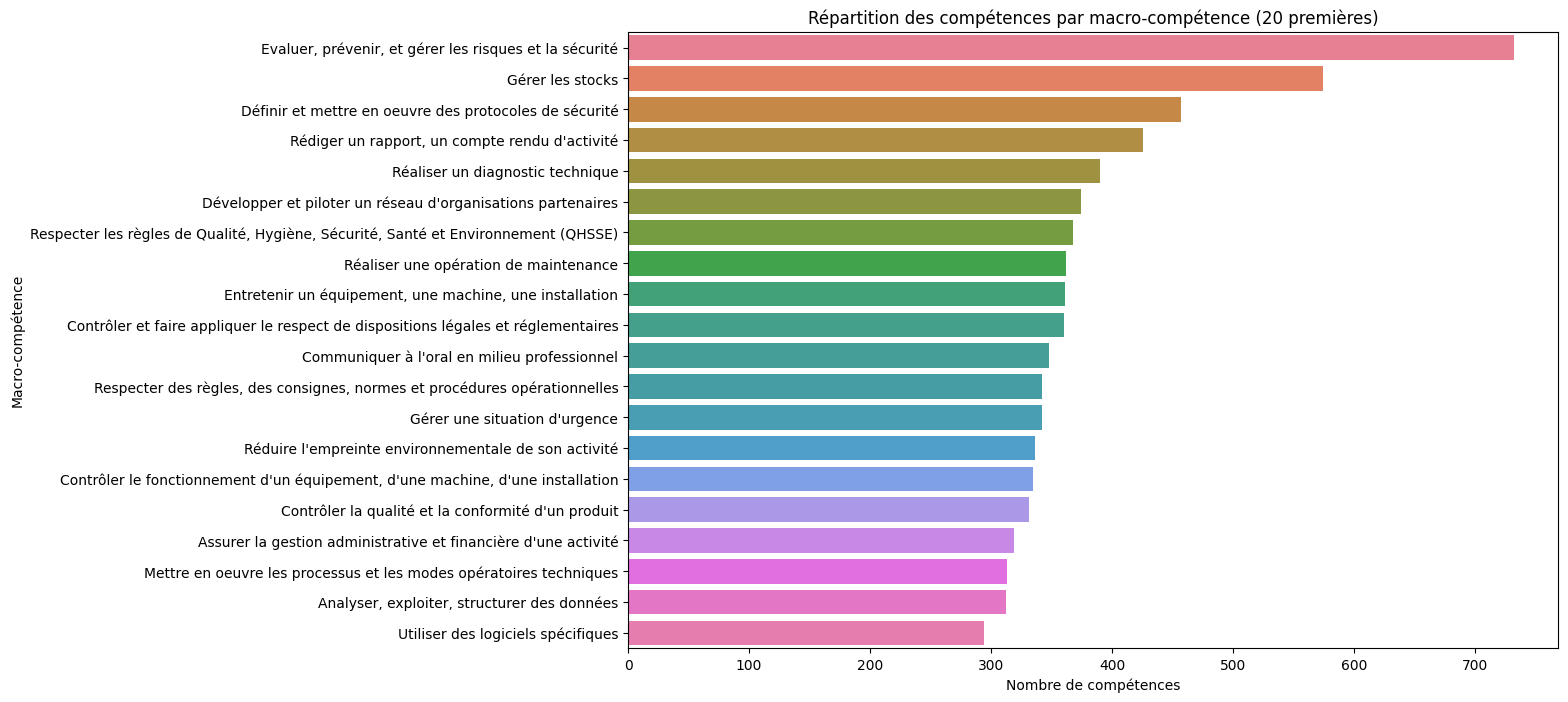

In [119]:
# 7.4. Répartition des compétences par macro-compétence
repartition_macro = df['libelle_macro_competence'].value_counts(dropna=False).reset_index()
repartition_macro.columns = ['macro_competence', 'nombre_competences']
 
# Pourcentage
repartition_macro['pourcentage'] = (repartition_macro['nombre_competences'] / len(df)) * 100
repartition_macro['pourcentage'] = repartition_macro['pourcentage'].round(2)
print(f"Répartition des 20 premières macro-compétences (sur {nb_macro_competence}) :")
display(repartition_macro[['macro_competence', 'nombre_competences', 'pourcentage']].head(20))
 
# Visualisation des 20 premières macro-compétences
plt.figure(figsize=(12, 8))
sns.barplot(
    data=repartition_macro.head(20),
    x='nombre_competences',
    y='macro_competence',
    hue='macro_competence',
    dodge=False
)
plt.title('Répartition des compétences par macro-compétence (20 premières)')
plt.xlabel('Nombre de compétences')
plt.ylabel('Macro-compétence')
plt.legend([], [], frameon=False)
plt.show()

### Lecture du résultat:
La répartition par pourcentage montre une forte dispersion : aucune macro-compétence ne dépasse 2 % du total, ce qui signifie qu’il y a une longue traîne de macro-compétences moins fréquentes mais nombreuses. 

La macro-compétence la plus représentée est : 'Évaluer, prévenir, et gérer les risques et la sécurité' : 732 compétences (1,88 %)
Les suivantes regroupent des activités de gestion opérationnelle et administrative :
- 'Gérer les stocks' : 574 compétences (1,47 %)
- 'Définir et mettre en oeuvre des protocoles de sécurité' : 457 compétences (1,17 %)
- 'Rédiger un rapport, un compte rendu d'activité' : 426 compétences (1,09 %)
- 'Réaliser un diagnostic technique' : 390 compétences (1,00 %)
- 'Développer et piloter un réseau d'organisations partenaires' : 374 compétences (0,96 %)
 
Ces 6 premières macro-compétences sont centrées sur la sécurité, la gestion des stocks et la documentation, pouvant refléter une transversalité de leurs compétences.

In [124]:
# 7.5. Treemap avec domaine → enjeu → objectif → compétence
treemap_data = df.groupby(['domaine_competence', 'enjeu']).size().reset_index(name='nombre_occurrences')
fig = px.treemap(
    treemap_data,
    path=['domaine_competence', 'enjeu'],
    values='nombre_occurrences',
    title='Treemap : Domaine → Enjeu',
    color='nombre_occurrences',
    color_continuous_scale='Viridis'
)
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

treemap_data = df.groupby(['enjeu', 'objectif']).size().reset_index(name='nombre_occurrences')
fig = px.treemap(
    treemap_data,
    path=['enjeu', 'objectif'],
    values='nombre_occurrences',
    title='Treemap : Enjeu → Objectif',
    color='nombre_occurrences',
    color_continuous_scale='Viridis'
)
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

treemap_data = df.groupby(['objectif', 'libelle_competence']).size().reset_index(name='nombre_occurrences')
fig = px.treemap(
    treemap_data,
    path=['objectif', 'libelle_competence'],
    values='nombre_occurrences',
    title='Treemap : Objectif → Compétence',
    color='nombre_occurrences',
    color_continuous_scale='Viridis'
)
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

### Lecture du résultat:
Ces treemaps permettent de représenter le résultat de nos analyses précédentes sur les relations hiérarchiques Domaine → Enjeu → Objectif → Compétence.